# About Dataset

Predict students' dropout and academic success
Investigating the Impact of Social and Economic Factors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\CAPSTONE PROJECTS\\dataset.csv")

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [6]:
df.shape

(4424, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [8]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# Target Variable - Target

In [9]:
df.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [10]:
df = df[df.Target != "Enrolled"]

Text(0.5, 1.0, 'Barplot of Target')

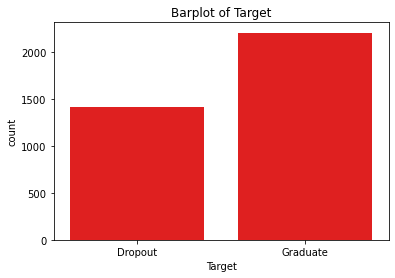

In [11]:
sns.countplot(df.Target, color='red')
plt.title('Barplot of Target')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [13]:
df['Target']= le.fit_transform(df['Target']) 

In [14]:
df.Target.value_counts()

1    2209
0    1421
Name: Target, dtype: int64

# Marital status

In [15]:
df['Marital status'].value_counts()

1    3199
2     327
4      75
5      22
6       5
3       2
Name: Marital status, dtype: int64

In [16]:
df['Marital status'].unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

Text(0.5, 1.0, 'Barplot of Marital status')

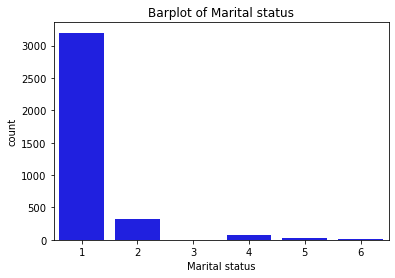

In [17]:
sns.countplot(df['Marital status'], color='blue')
plt.title('Barplot of Marital status')

<AxesSubplot:xlabel='Marital status', ylabel='Gender'>

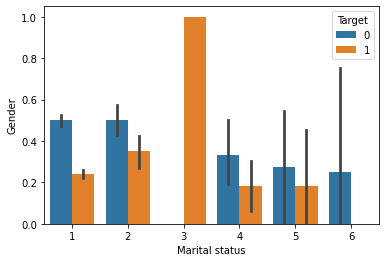

In [18]:
sns.barplot(data=df,x='Marital status',y='Gender', hue='Target')

In [19]:
df.rename(columns={'Marital status': 'Marital_status'}, inplace=True)

In [20]:
from scipy.stats import chi2_contingency

In [21]:
a=pd.crosstab(df.Marital_status,df.Target)
chi2_contingency(a)[1]

3.160760691704852e-10

# Application mode

In [22]:
df['Application mode'].value_counts()

1     1408
8      713
12     664
14     237
15     157
4      132
9      108
13      66
16      46
7       30
17      25
6       20
5       10
3        8
2        3
18       1
10       1
11       1
Name: Application mode, dtype: int64

Text(0.5, 1.0, 'Barplot of Application mode')

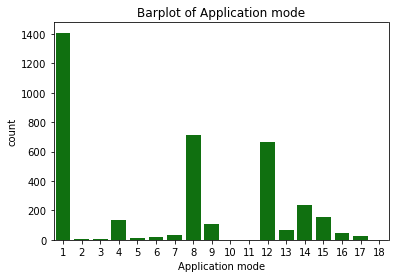

In [23]:
sns.countplot(df['Application mode'], color='green')
plt.title('Barplot of Application mode')

<AxesSubplot:xlabel='Application mode', ylabel='Gender'>

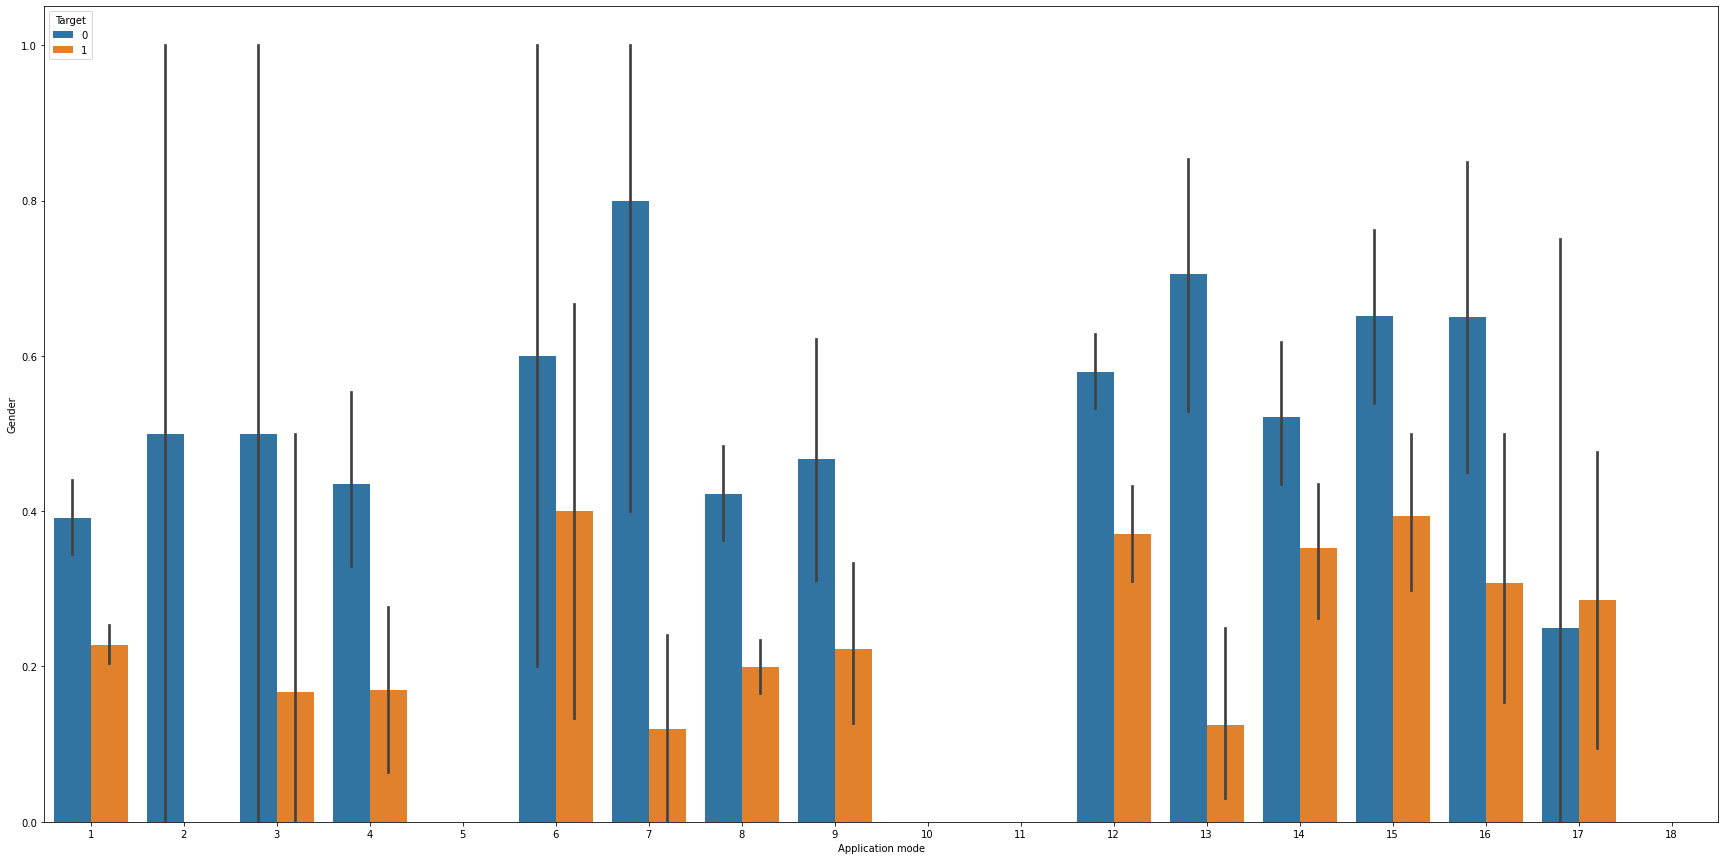

In [24]:
plt.figure(figsize=(30,15))
sns.barplot(data=df,x='Application mode',y='Gender', hue='Target')

In [25]:
df.rename(columns={'Application mode': 'Application_mode'}, inplace=True)

In [26]:
a=pd.crosstab(df.Application_mode,df.Target)
chi2_contingency(a)[1]

8.435153363624903e-73

# Application order

In [27]:
df['Application order'].value_counts()

1    2461
2     451
3     249
4     218
5     129
6     121
0       1
Name: Application order, dtype: int64

Text(0.5, 1.0, 'Barplot of Application order')

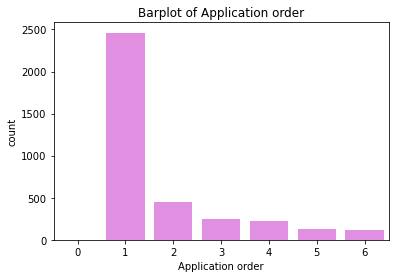

In [28]:
sns.countplot(df['Application order'], color='violet')
plt.title('Barplot of Application order')

In [29]:
df.rename(columns={"Application order": 'Application_order'}, inplace=True)

<AxesSubplot:xlabel='Application_order', ylabel='Gender'>

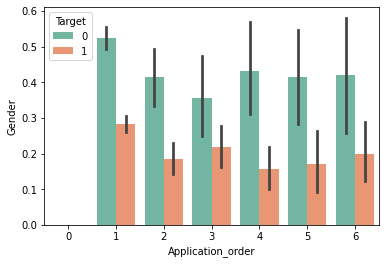

In [30]:
sns.barplot(data=df,x='Application_order',y='Gender', hue='Target', palette='Set2')

In [31]:
a=pd.crosstab(df.Application_order,df.Target)
chi2_contingency(a)[1]

1.4355578069352192e-09

# Course

In [32]:
df.Course.value_counts()

12    666
10    313
15    297
9     272
6     262
14    220
17    214
11    211
3     194
5     184
2     178
4     173
16    142
8     120
7     106
13     69
1       9
Name: Course, dtype: int64

Text(0.5, 1.0, 'Barplot of Course')

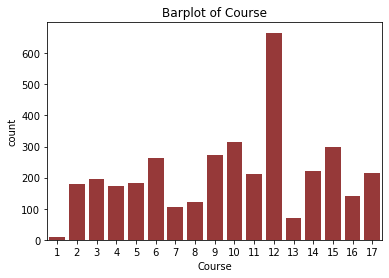

In [33]:
sns.countplot(df.Course, color='brown')
plt.title('Barplot of Course')

<AxesSubplot:xlabel='Course', ylabel='Gender'>

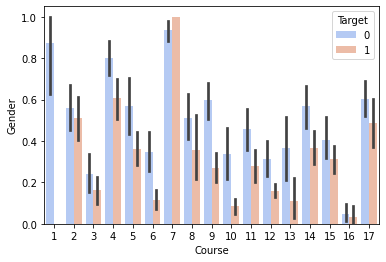

In [34]:
sns.barplot(data=df,x='Course',y='Gender', hue='Target', palette='coolwarm')

In [35]:
a=pd.crosstab(df.Course,df.Target)
chi2_contingency(a)[1]

3.4976953525696718e-84

# Daytime/evening attendance

In [36]:
df['Daytime/evening attendance'].value_counts()

1    3222
0     408
Name: Daytime/evening attendance, dtype: int64

Text(0.5, 1.0, 'Barplot of Daytime/evening attendance')

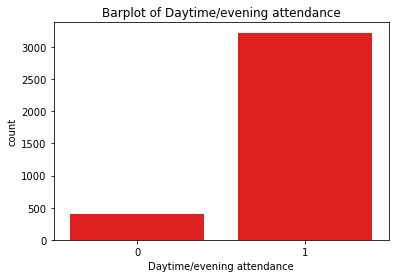

In [37]:
sns.countplot(df['Daytime/evening attendance'], color='red')
plt.title('Barplot of Daytime/evening attendance')

In [38]:
df.rename(columns={"Daytime/evening attendance": 'Daytime_evening_attendance'}, inplace=True)

<AxesSubplot:xlabel='Daytime_evening_attendance', ylabel='Gender'>

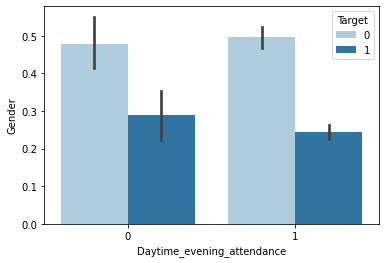

In [39]:
sns.barplot(data=df,x='Daytime_evening_attendance',y='Gender', hue='Target', palette='Paired')

In [40]:
from scipy.stats import chi2_contingency

In [41]:
#Hypothesis Testing
a = pd.crosstab(df.Daytime_evening_attendance, df.Target)
chi2_contingency(a)[1]

4.728746697041629e-07

# Previous qualification

In [42]:
df['Previous qualification'].value_counts()

1     3019
14     164
12     149
3      122
9       39
15      34
16      28
2       22
6       15
7       11
4        7
17       6
13       6
8        4
11       2
5        1
10       1
Name: Previous qualification, dtype: int64

Text(0.5, 1.0, 'Barplot of Previous qualification')

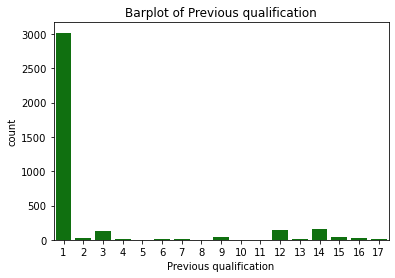

In [43]:
sns.countplot(df['Previous qualification'], color='green')
plt.title('Barplot of Previous qualification')

In [44]:
df.rename(columns={'Previous qualification': 'Previous_qualification'}, inplace=True)

<AxesSubplot:xlabel='Previous_qualification', ylabel='Gender'>

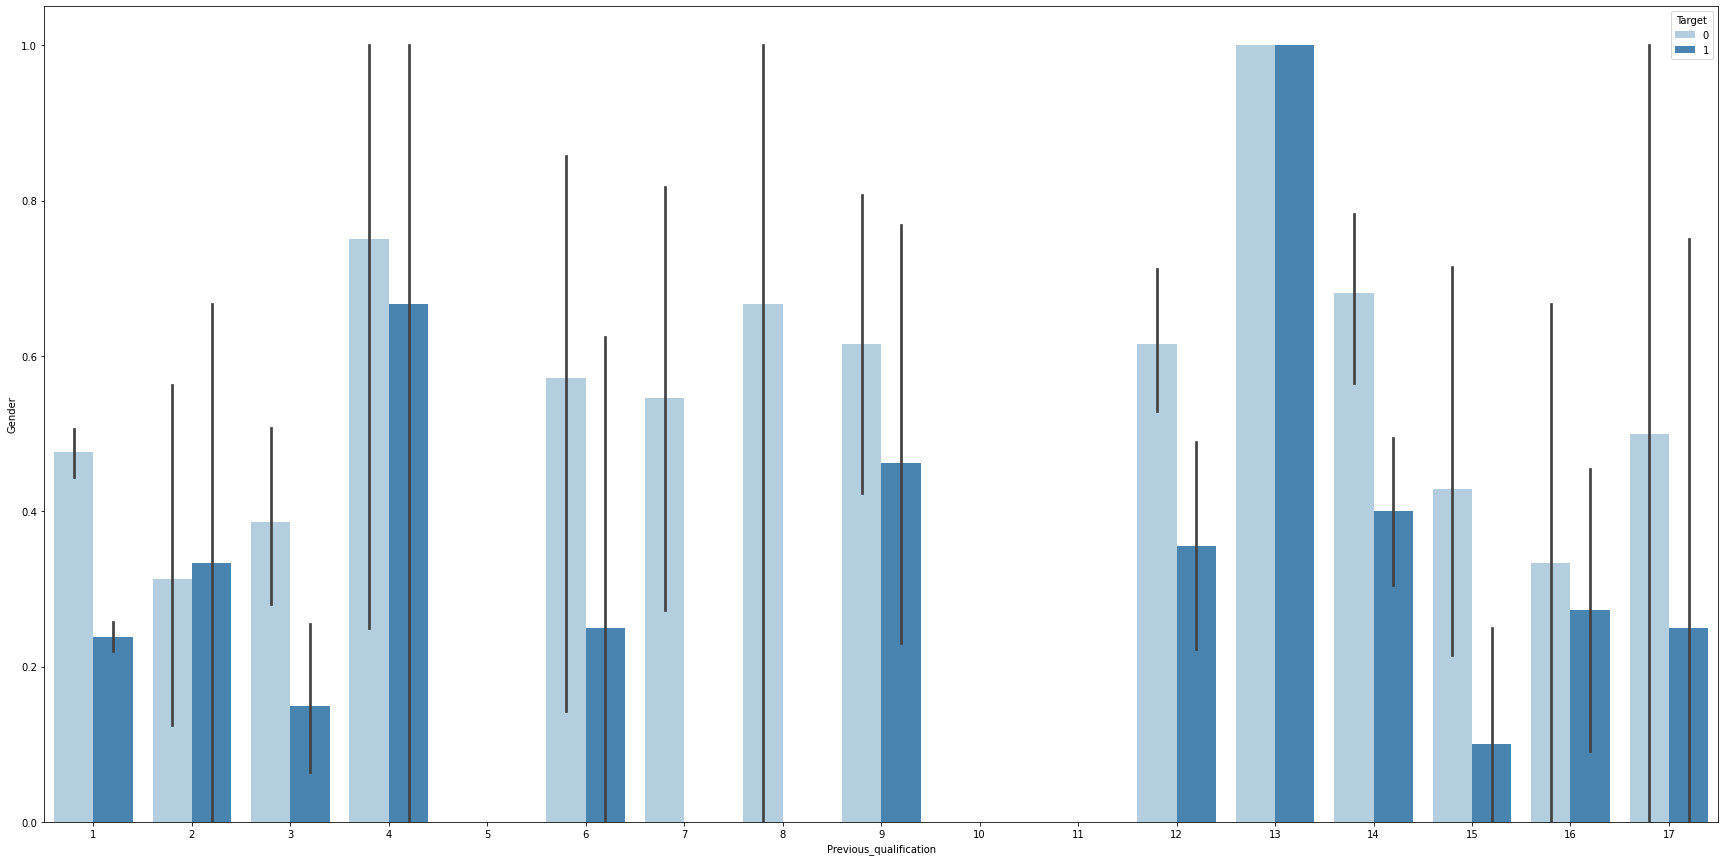

In [45]:
plt.figure(figsize=(30,15))
sns.barplot(data=df,x='Previous_qualification',y='Gender', hue='Target', palette='Blues')

In [46]:
a=pd.crosstab(df.Previous_qualification,df.Target)
chi2_contingency(a)[1]

5.9524532879634e-24

# Nacionality

In [47]:
df.Nacionality.value_counts()

1     3544
14      32
9       12
12       9
3        8
10       5
4        3
18       3
17       2
16       2
2        2
11       1
15       1
5        1
21       1
8        1
6        1
7        1
19       1
Name: Nacionality, dtype: int64

Text(0.5, 1.0, 'Barplot of Nacionality')

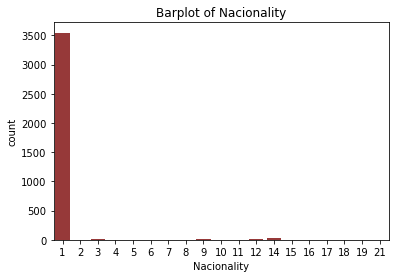

In [48]:
sns.countplot(df.Nacionality, color='brown')
plt.title('Barplot of Nacionality')

<AxesSubplot:xlabel='Nacionality', ylabel='Gender'>

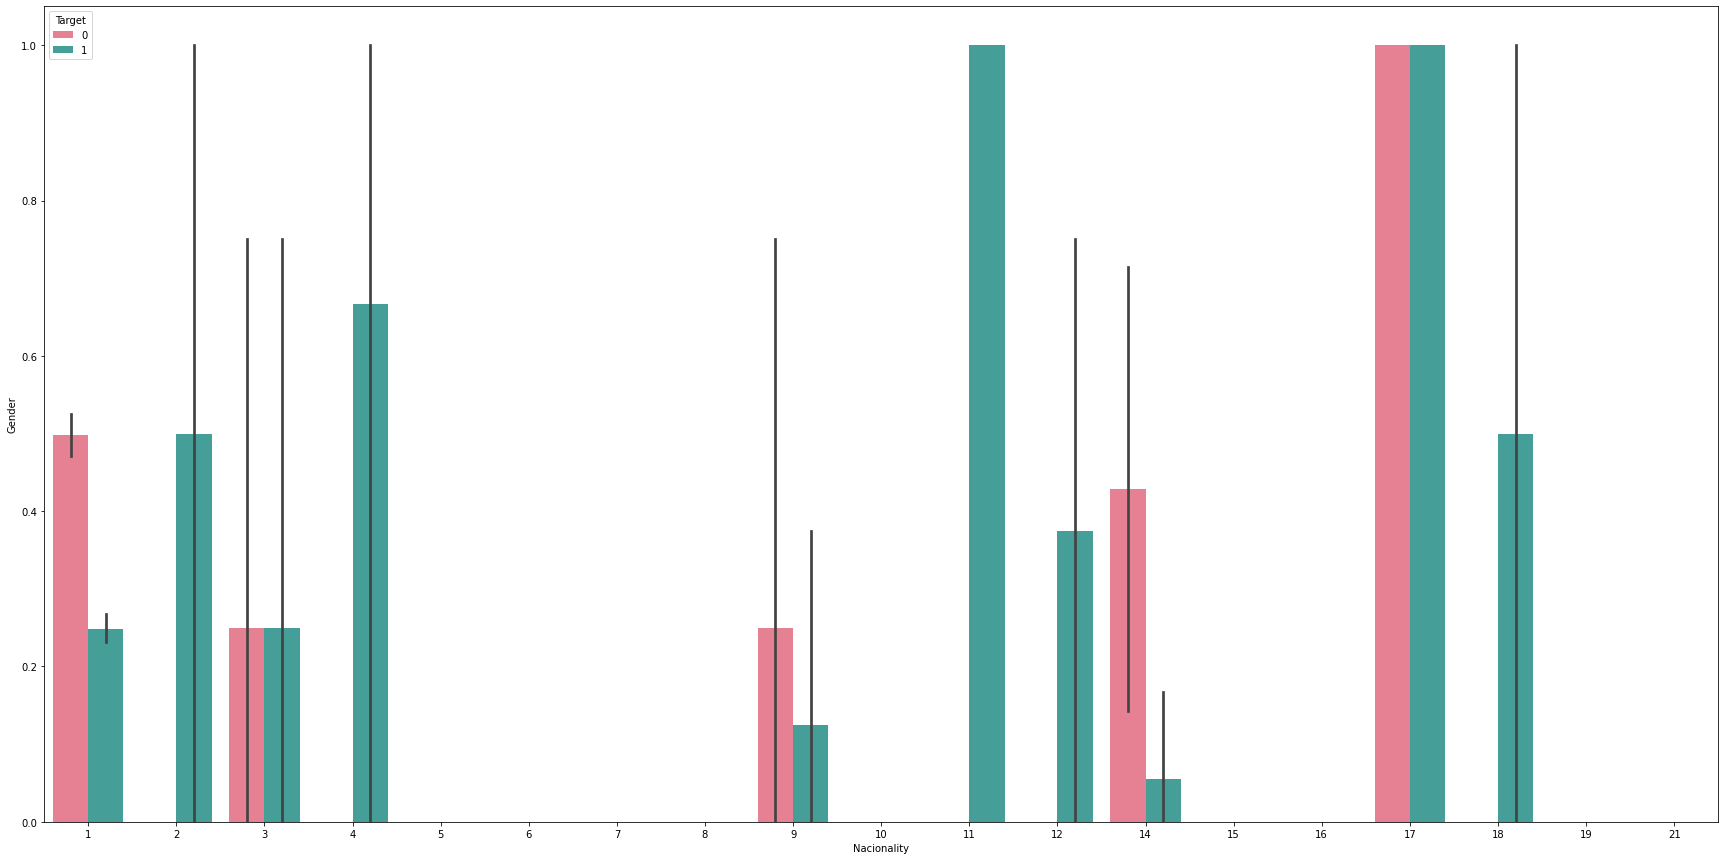

In [49]:
plt.figure(figsize=(30,15))
sns.barplot(data=df,x='Nacionality',y='Gender', hue='Target', palette='husl')

In [50]:
a=pd.crosstab(df.Nacionality,df.Target)
chi2_contingency(a)[1]

0.34128154540789707

In [51]:
df.drop('Nacionality',axis=1,inplace=True)

# Mother's qualification

In [52]:
df.rename(columns={"Mother's qualification": 'Mothers_qualification'}, inplace=True)

In [53]:
df['Mothers_qualification'].value_counts()

1     865
22    840
13    777
23    471
3     337
19    127
2      60
10     39
4      34
5      16
25      8
7       8
24      6
26      6
6       4
27      4
28      3
17      3
8       3
9       3
21      3
20      3
18      3
11      2
12      1
14      1
16      1
15      1
29      1
Name: Mothers_qualification, dtype: int64

Text(0.5, 1.0, 'Barplot of Mothers_qualification')

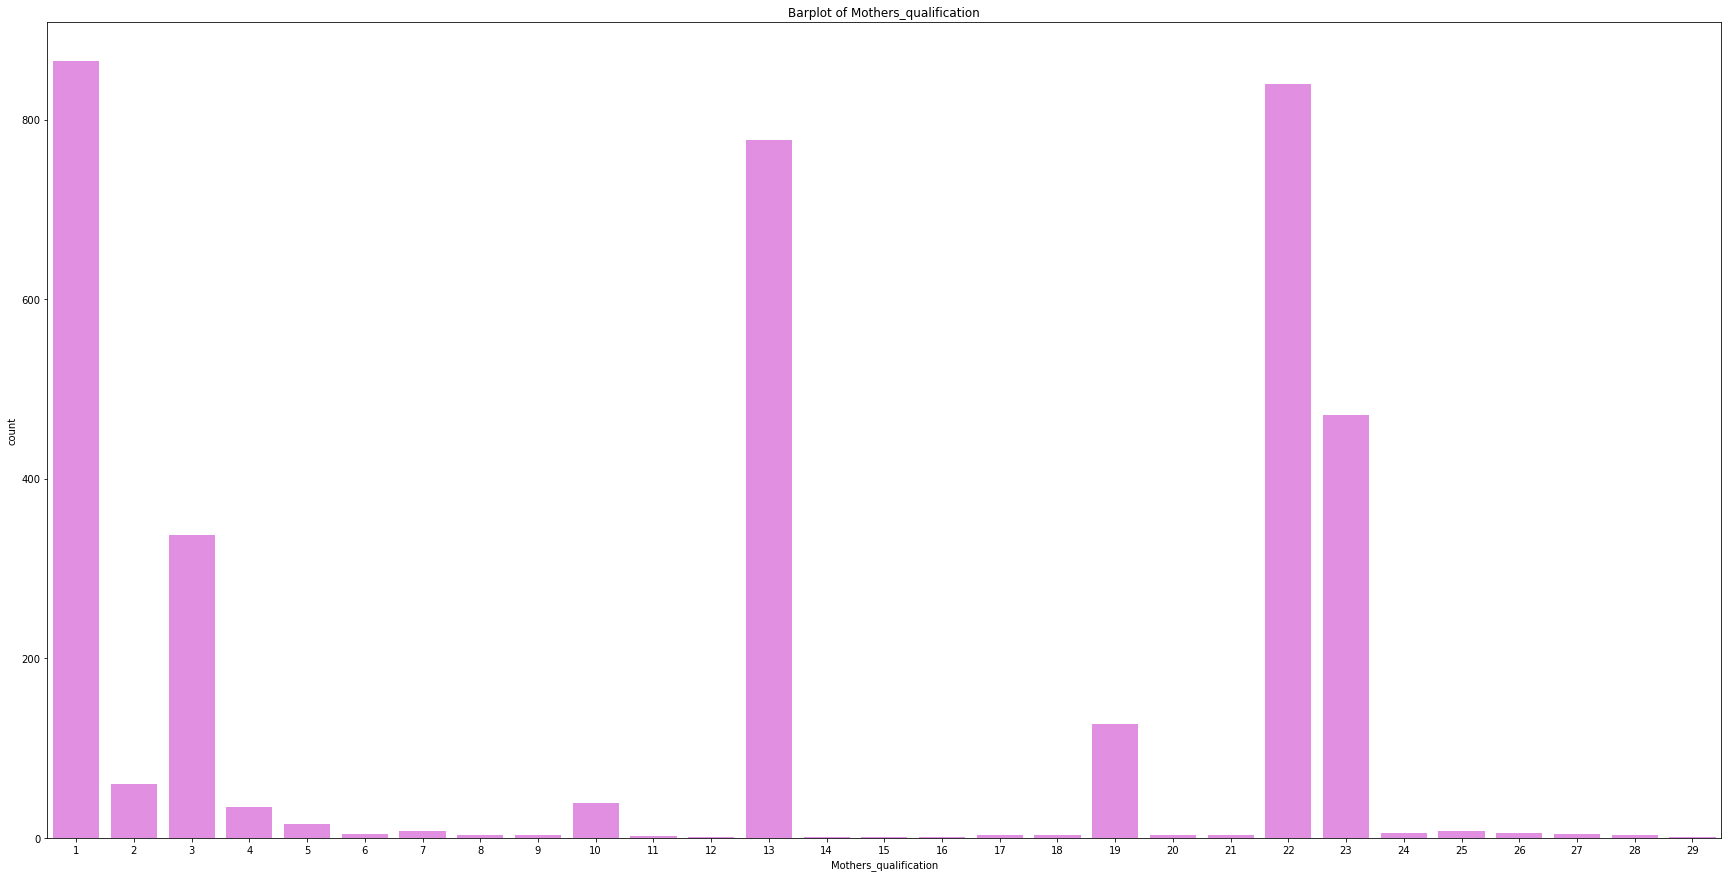

In [54]:
plt.figure(figsize=(30,15))
sns.countplot(df.Mothers_qualification, color='violet')
plt.title('Barplot of Mothers_qualification')

<AxesSubplot:xlabel='Mothers_qualification', ylabel='Gender'>

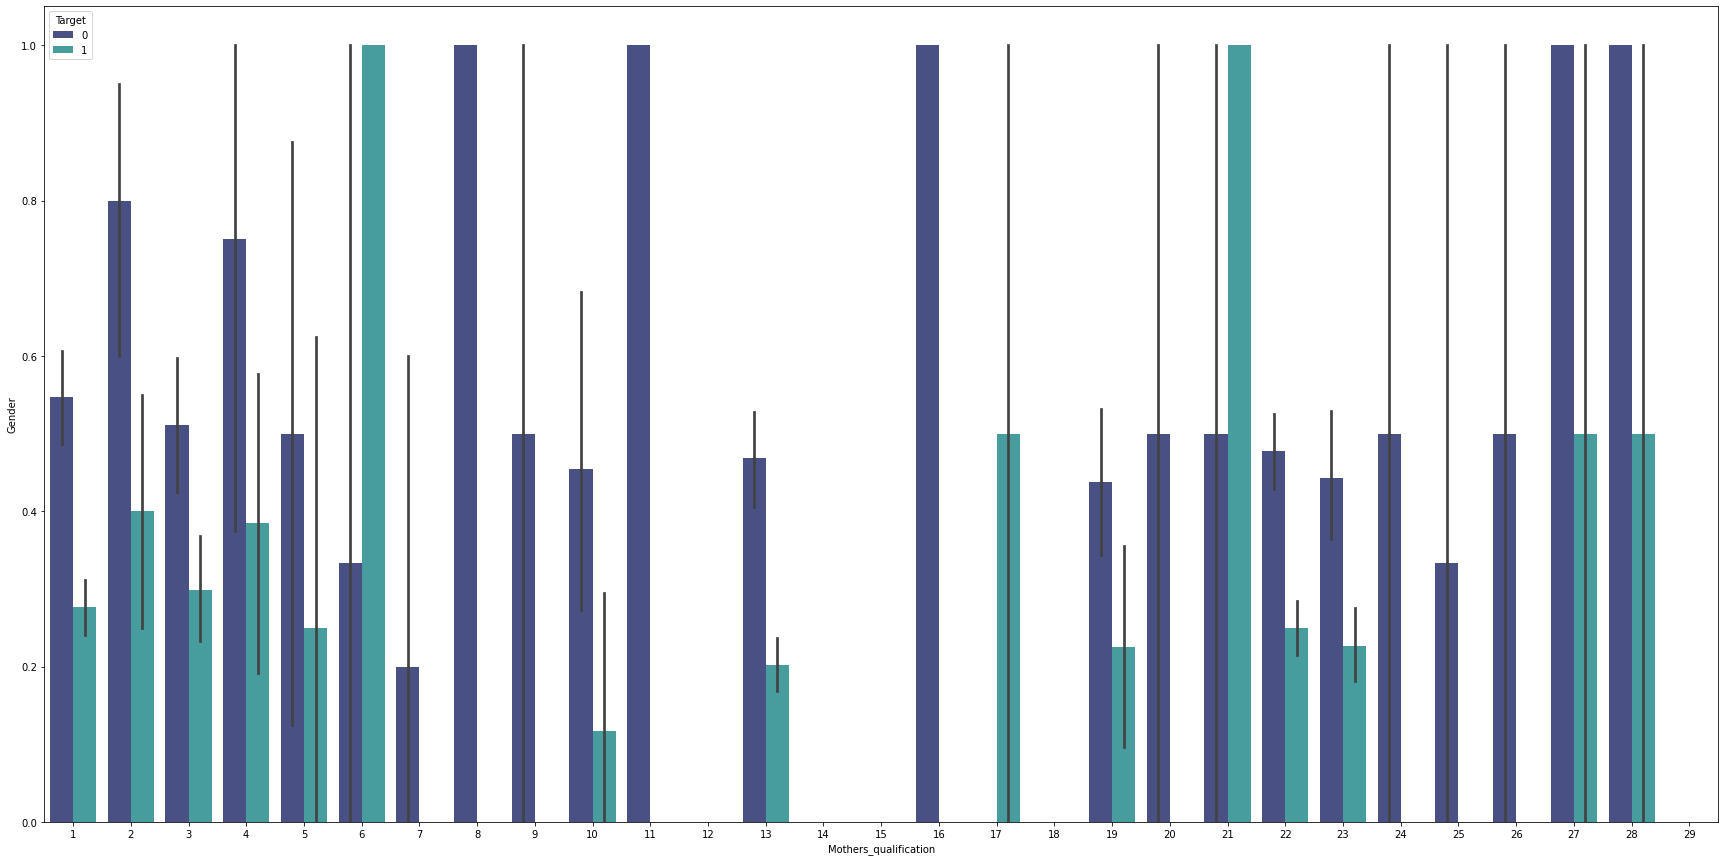

In [55]:
plt.figure(figsize=(30,15))
sns.barplot(data=df,x='Mothers_qualification',y='Gender', hue='Target', palette='mako')

In [56]:
a=pd.crosstab(df.Mothers_qualification,df.Target)
chi2_contingency(a)[1]

2.2012172759487927e-17

# Father's qualification

In [57]:
df.rename(columns={"Father's qualification": 'Fathers_qualification'}, inplace=True)

In [58]:
df.Fathers_qualification.value_counts()

27    1010
14     785
1      732
28     575
3      220
24     109
2       43
10      34
4       32
5       15
29      13
9       10
26       8
7        5
30       5
12       4
16       4
20       3
21       3
8        2
33       2
18       2
25       2
6        2
23       1
19       1
34       1
17       1
15       1
32       1
13       1
11       1
31       1
22       1
Name: Fathers_qualification, dtype: int64

Text(0.5, 1.0, 'Barplot of Fathers_qualification')

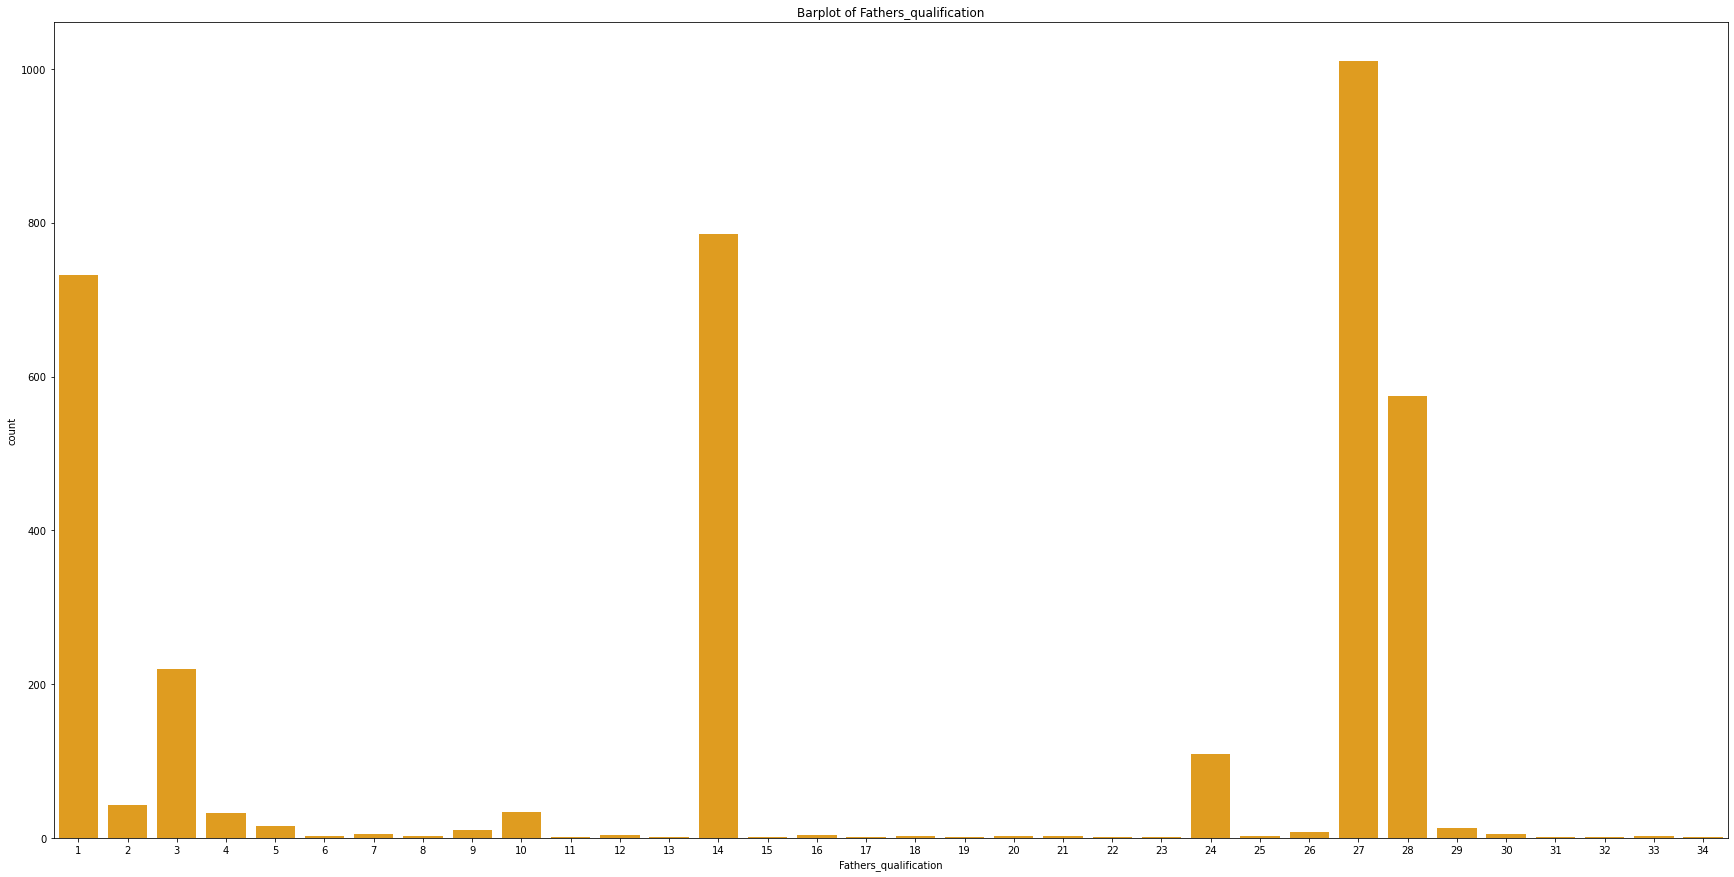

In [59]:
plt.figure(figsize=(30,15))
sns.countplot(df.Fathers_qualification, color='orange')
plt.title('Barplot of Fathers_qualification')

<AxesSubplot:xlabel='Fathers_qualification', ylabel='Gender'>

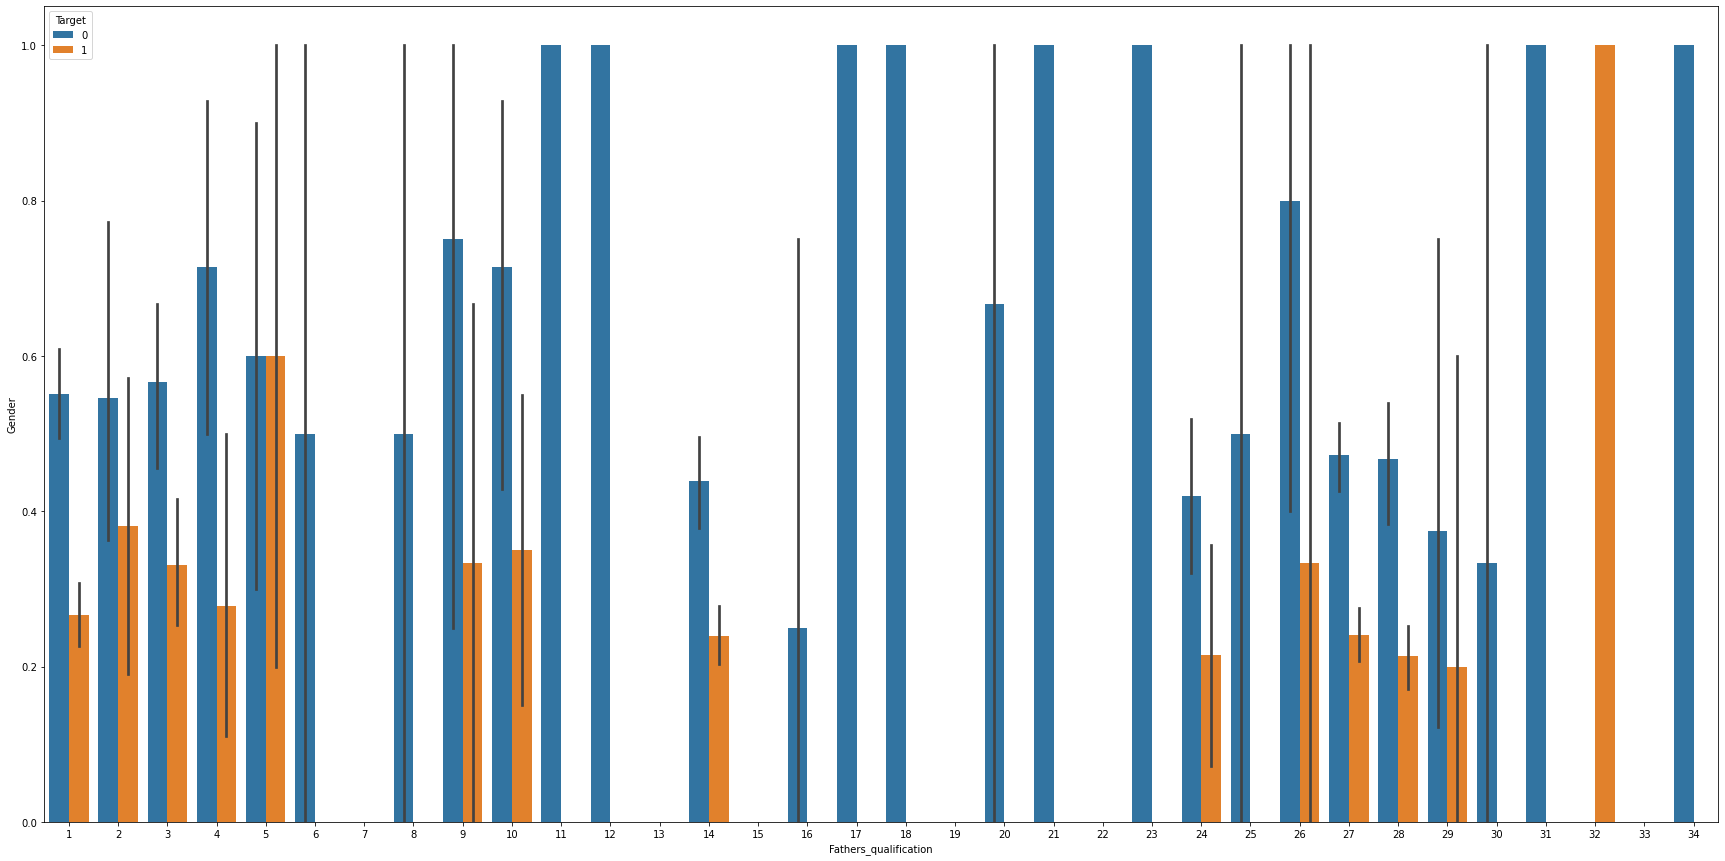

In [60]:
plt.figure(figsize=(30,15))
sns.barplot(data=df,x='Fathers_qualification',y='Gender', hue='Target', palette='tab10')

In [61]:
a=pd.crosstab(df.Fathers_qualification,df.Target)
chi2_contingency(a)[1]

1.7545504183274772e-16

# Mother's occupation

In [62]:
df.rename(columns={"Mother's occupation": 'Mothers_occupation'}, inplace=True)

In [63]:
df.Mothers_occupation.value_counts()

10    1313
5      670
6      436
4      272
3      240
8      224
1      143
2       87
7       77
12      70
9       29
13      15
29      15
15       5
20       4
32       4
31       4
22       4
28       3
30       2
11       2
23       2
19       2
25       2
16       1
18       1
21       1
26       1
24       1
Name: Mothers_occupation, dtype: int64

Text(0.5, 1.0, 'Barplot of Mothers_occupation')

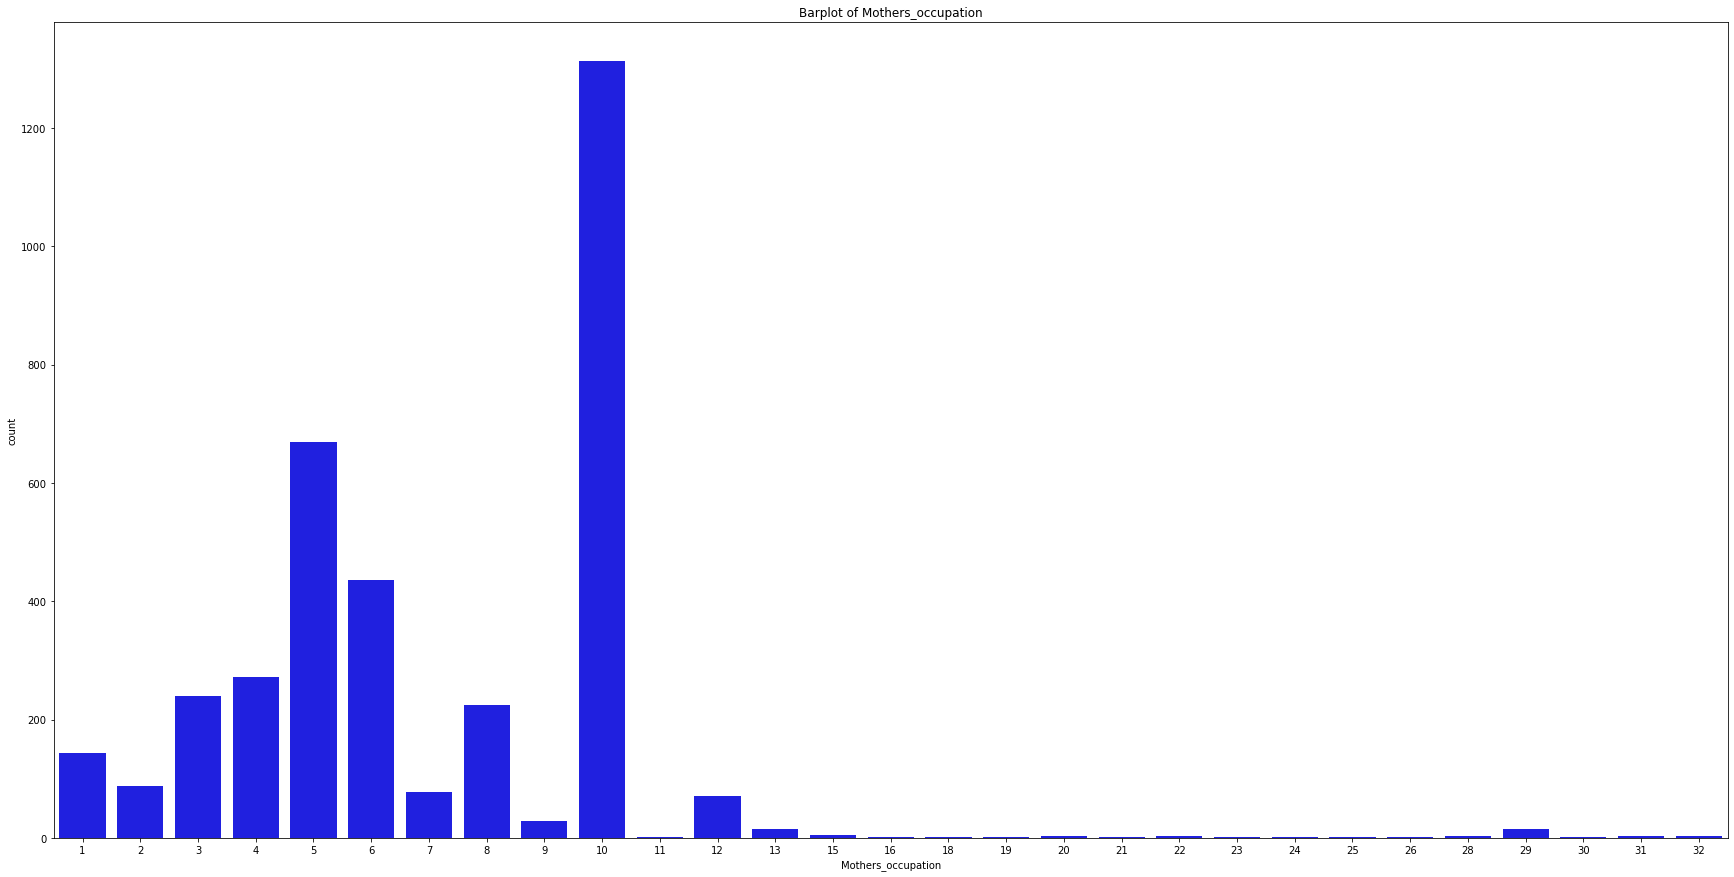

In [64]:
plt.figure(figsize=(30,15))
sns.countplot(df.Mothers_occupation, color='blue')
plt.title('Barplot of Mothers_occupation')

<AxesSubplot:xlabel='Mothers_occupation', ylabel='Gender'>

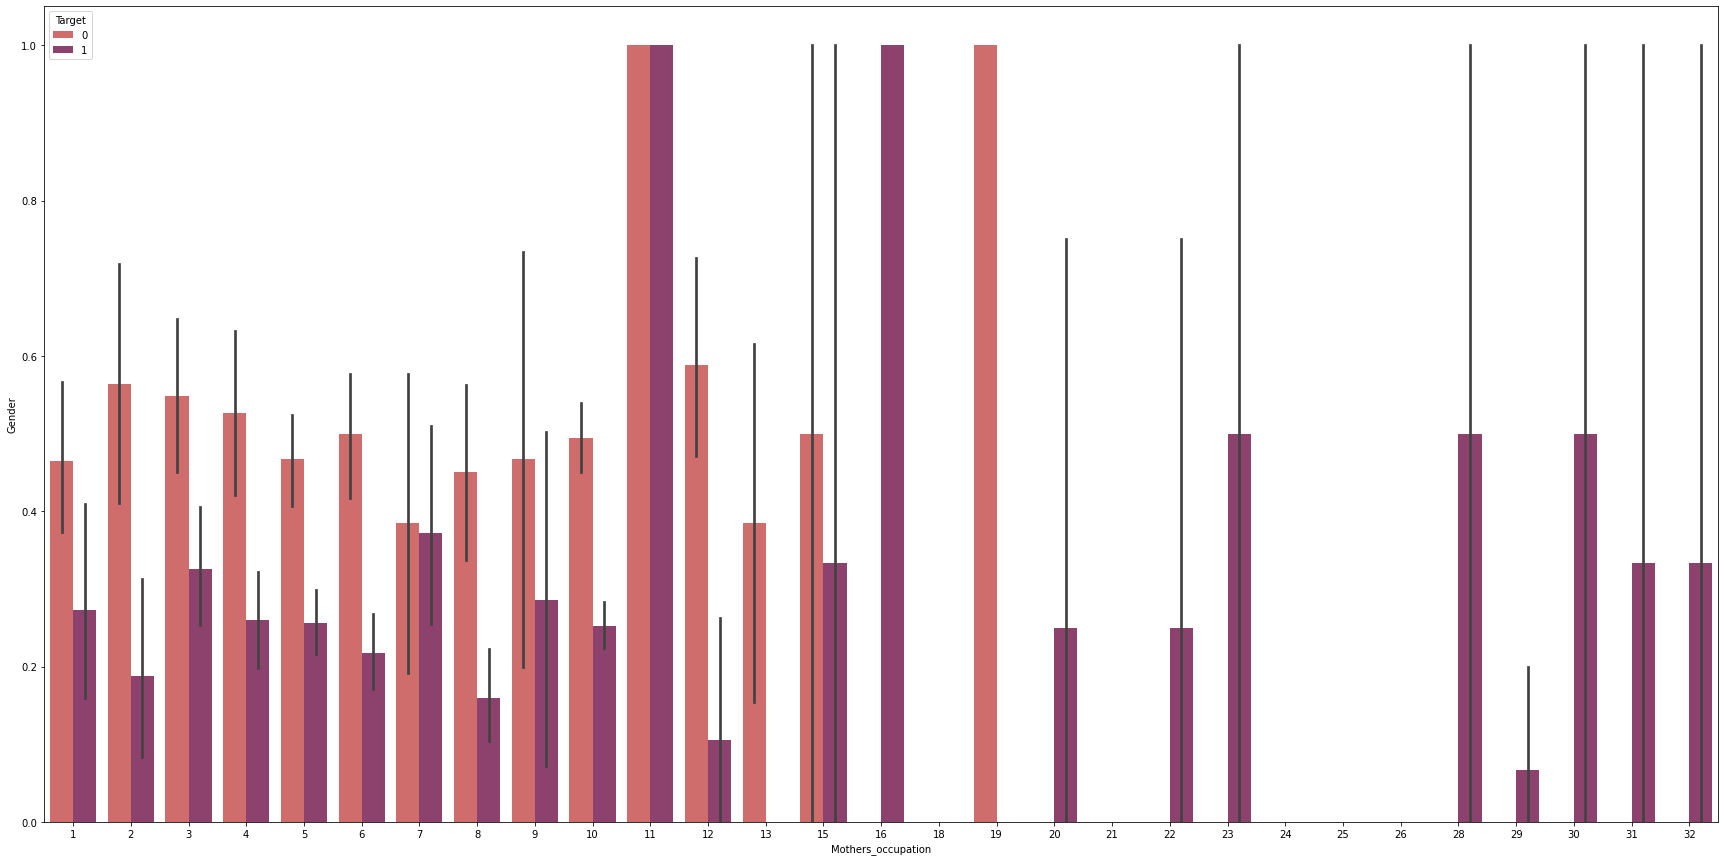

In [65]:
plt.figure(figsize=(30,15))
sns.barplot(data=df,x='Mothers_occupation',y='Gender', hue='Target', palette='flare')

In [66]:
a=pd.crosstab(df.Mothers_occupation,df.Target)
chi2_contingency(a)[1]

1.5551375664452738e-16

# Father's occupation

In [67]:
df.rename(columns={"Father's occupation": 'Fathers_occupation'}, inplace=True)

In [68]:
df.Fathers_occupation.value_counts()

10    847
8     555
6     409
4     321
5     312
9     263
11    212
7     194
3     147
1     125
2     111
12     65
13     17
44      7
29      5
43      4
16      3
36      3
45      2
39      2
30      2
26      2
40      2
35      2
38      1
17      1
20      1
14      1
27      1
18      1
33      1
32      1
23      1
42      1
15      1
31      1
37      1
28      1
41      1
46      1
22      1
21      1
Name: Fathers_occupation, dtype: int64

Text(0.5, 1.0, 'Barplot of Fathers_occupation')

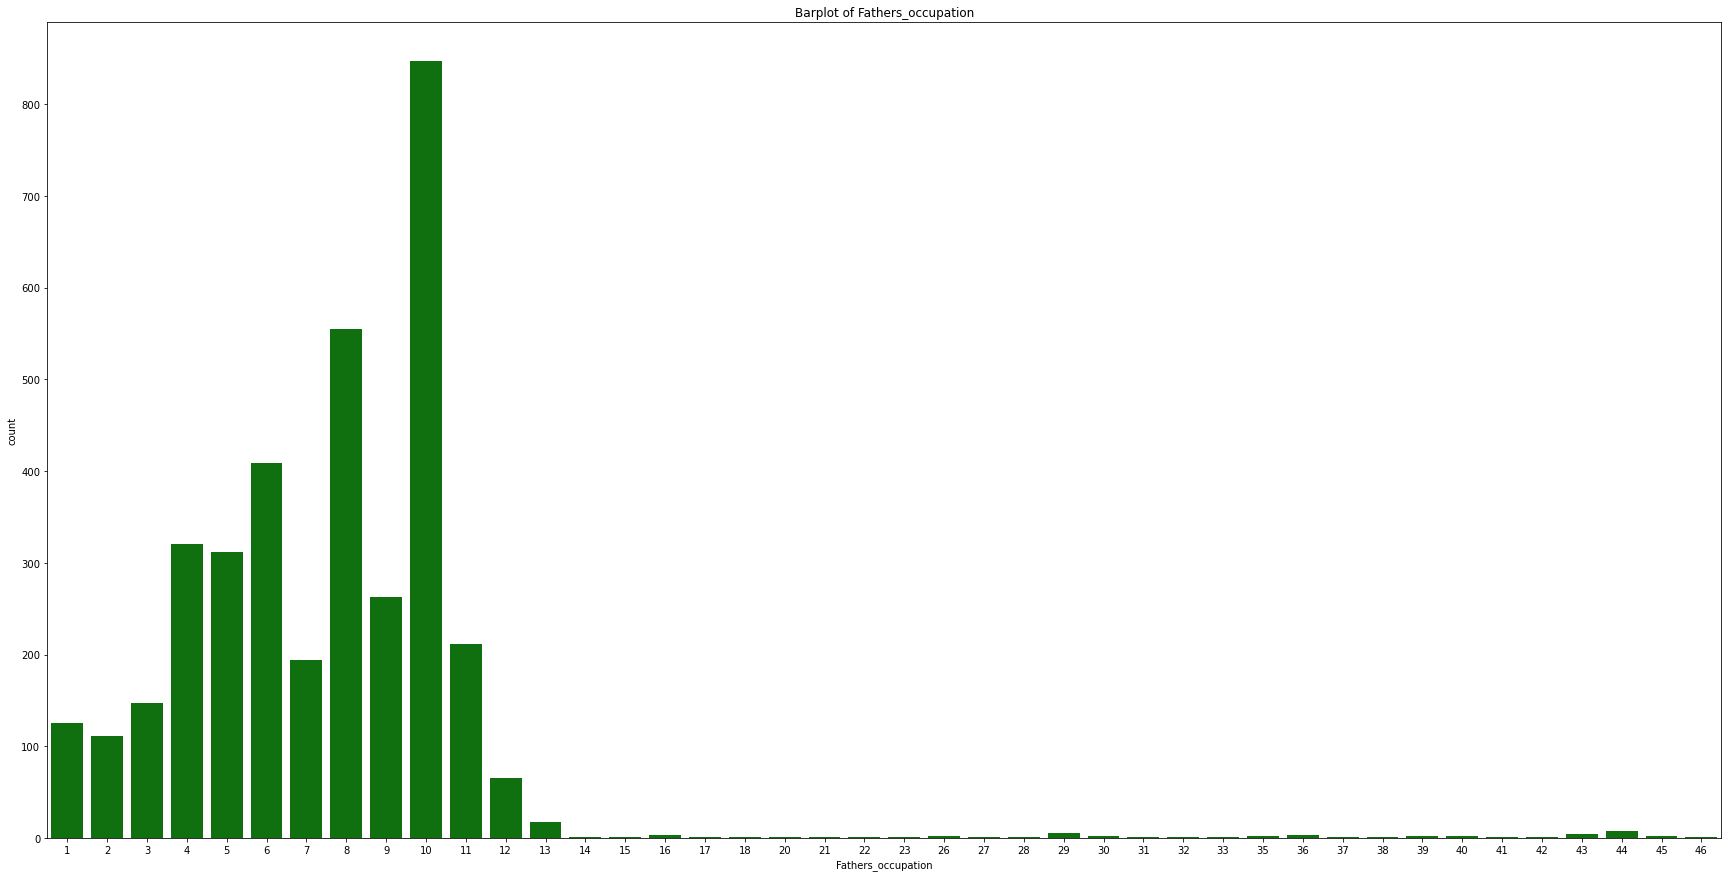

In [69]:
plt.figure(figsize=(30,15))
sns.countplot(df.Fathers_occupation, color='green')
plt.title('Barplot of Fathers_occupation')

<AxesSubplot:xlabel='Fathers_occupation', ylabel='Gender'>

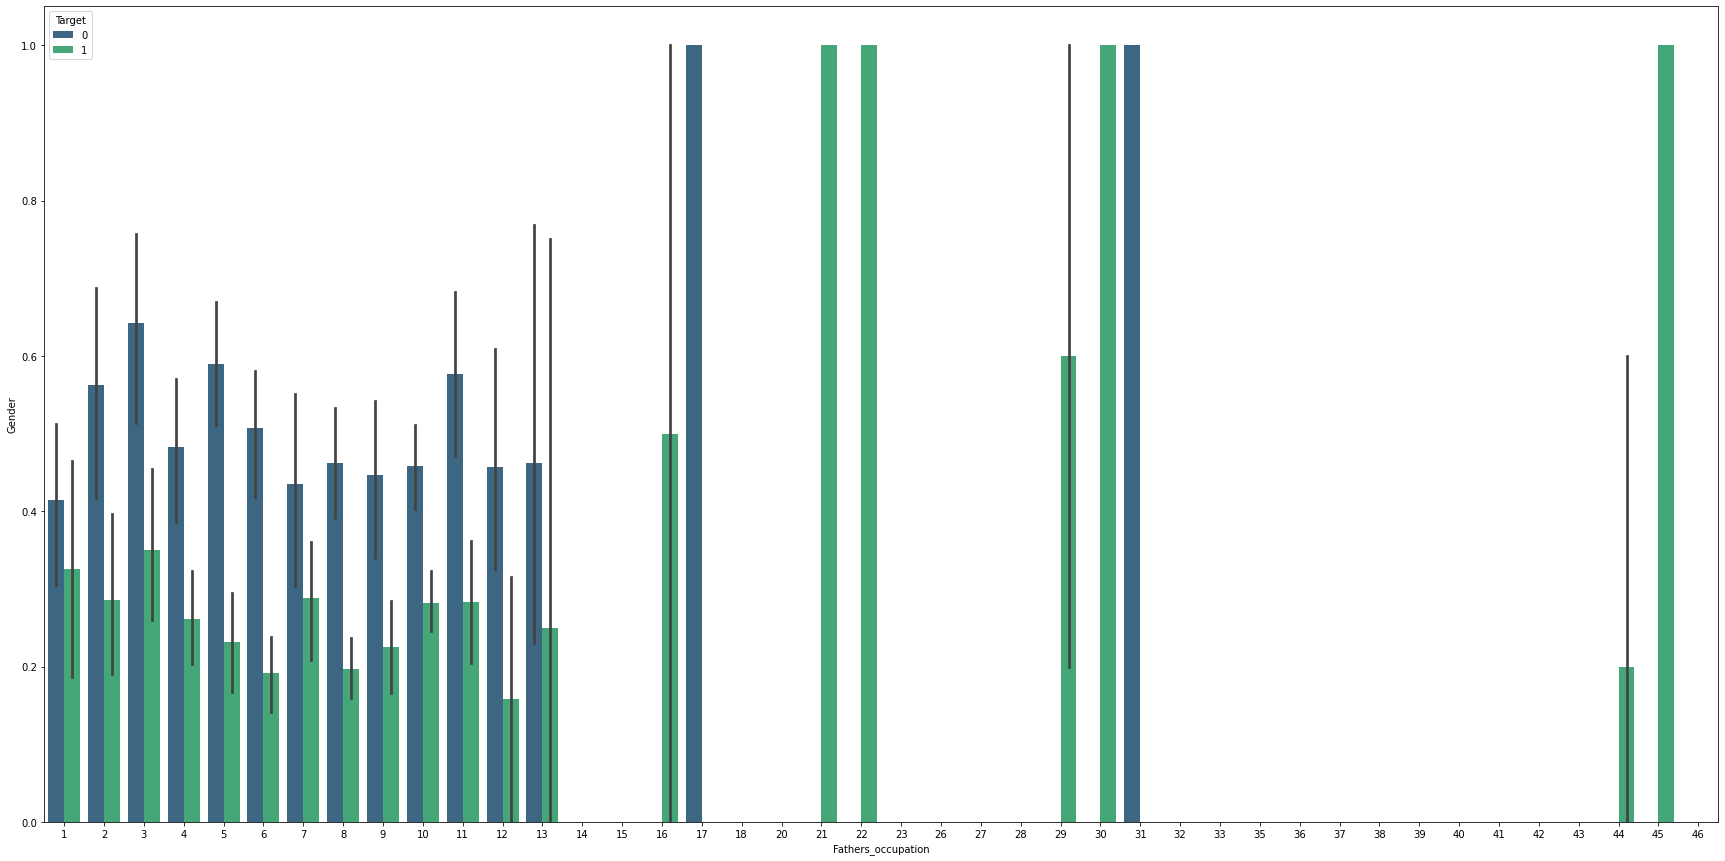

In [70]:
plt.figure(figsize=(30,15))
sns.barplot(data=df,x='Fathers_occupation',y='Gender', hue='Target', palette='viridis')

In [71]:
a=pd.crosstab(df.Fathers_occupation,df.Target)
chi2_contingency(a)[1]

1.725335989564928e-10

# Displaced

In [72]:
df.Displaced.value_counts()

1    1993
0    1637
Name: Displaced, dtype: int64

Text(0.5, 1.0, 'Barplot of Displaced')

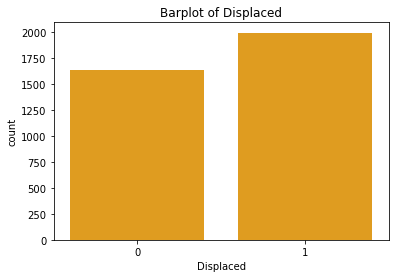

In [73]:
sns.countplot(df.Displaced, color='orange')
plt.title('Barplot of Displaced')

<AxesSubplot:xlabel='Displaced', ylabel='Gender'>

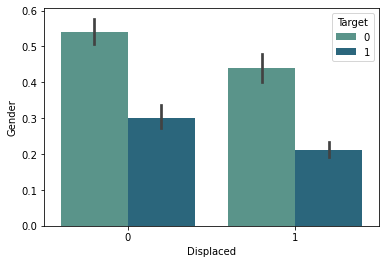

In [74]:
sns.barplot(data=df,x='Displaced',y='Gender', hue='Target', palette='crest')

In [75]:
from scipy.stats import chi2_contingency

In [76]:
#Hypothesis Testing
a = pd.crosstab(df.Displaced, df.Target)
chi2_contingency(a)[1]

3.906372785217124e-14

# Educational special needs

In [77]:
df.rename(columns={"Educational special needs": 'Educational_special_needs'}, inplace=True)

In [78]:
df.Educational_special_needs.value_counts()

0    3590
1      40
Name: Educational_special_needs, dtype: int64

Text(0.5, 1.0, 'Barplot of Educational_special_needs')

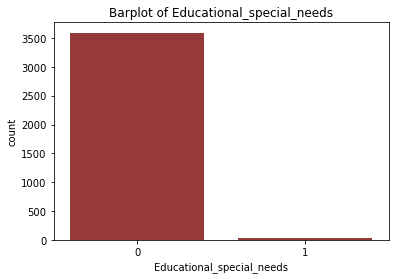

In [79]:
sns.countplot(df.Educational_special_needs, color='brown')
plt.title('Barplot of Educational_special_needs')

<AxesSubplot:xlabel='Educational_special_needs', ylabel='Gender'>

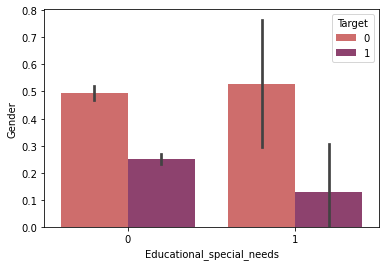

In [80]:
sns.barplot(data=df,x='Educational_special_needs',y='Gender', hue='Target', palette='flare')

In [81]:
#Hypothesis Testing
a = pd.crosstab(df.Educational_special_needs, df.Target)
chi2_contingency(a)[1]

0.7839673327129488

In [82]:
df.drop('Educational_special_needs',axis=1,inplace=True)

# Debtor

In [83]:
df.Debtor.value_counts()

0    3217
1     413
Name: Debtor, dtype: int64

Text(0.5, 1.0, 'Barplot of Debtor')

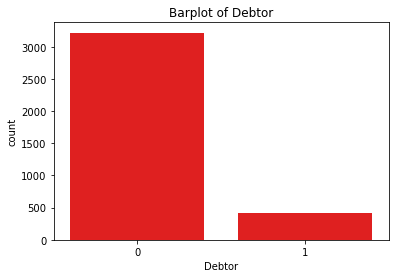

In [84]:
sns.countplot(df.Debtor, color='red')
plt.title('Barplot of Debtor')

<AxesSubplot:xlabel='Debtor', ylabel='Gender'>

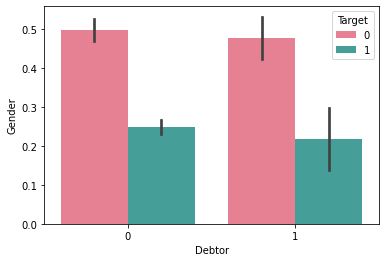

In [85]:
sns.barplot(data=df,x='Debtor',y='Gender', hue='Target', palette='husl')

In [86]:
#Hypothesis Testing
a = pd.crosstab( df.Debtor, df.Target)
chi2_contingency(a)[1]

6.141423909917533e-58

# Tuition fees up to date

In [87]:
df.rename(columns={"Tuition fees up to date": 'Tuition_fees_up_to_date'}, inplace=True)

In [88]:
df.Tuition_fees_up_to_date.value_counts()

1    3144
0     486
Name: Tuition_fees_up_to_date, dtype: int64

Text(0.5, 1.0, 'Barplot of Tuition_fees_up_to_date')

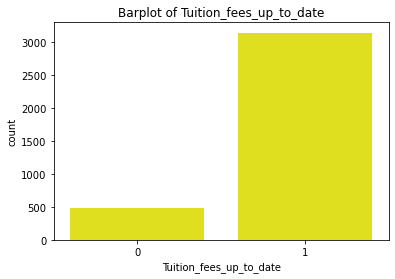

In [89]:
sns.countplot(df.Tuition_fees_up_to_date, color='yellow')
plt.title('Barplot of Tuition_fees_up_to_date')

<AxesSubplot:xlabel='Tuition_fees_up_to_date', ylabel='Gender'>

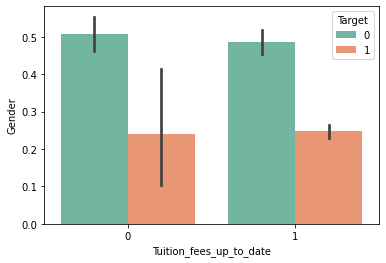

In [90]:
sns.barplot(data=df,x='Tuition_fees_up_to_date',y='Gender', hue='Target', palette='Set2')

In [91]:
#Hypothesis Testing
a = pd.crosstab(df.Tuition_fees_up_to_date, df.Target)
chi2_contingency(a)[1]

9.189124239942275e-156

# Gender

In [92]:
df.Gender.value_counts()

0    2381
1    1249
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Barplot of Gender')

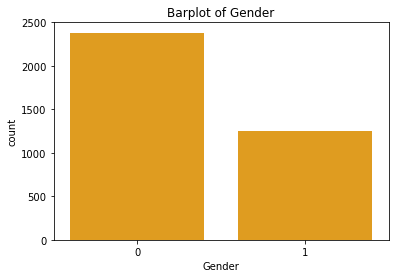

In [93]:
sns.countplot(df.Gender, color='orange')
plt.title('Barplot of Gender')

<AxesSubplot:xlabel='Gender', ylabel='Target'>

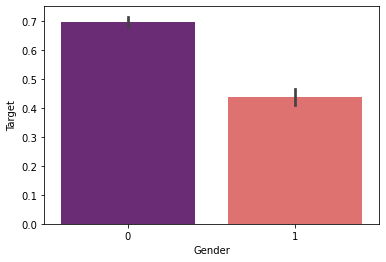

In [94]:
sns.barplot(data=df,x='Gender',y='Target', palette='magma')

In [95]:
#Hypothesis Testing
a = pd.crosstab(df.Gender, df.Target)
chi2_contingency(a)[1]

8.255973592335283e-52

# Scholarship holder

In [96]:
df['Scholarship holder'].value_counts()

0    2661
1     969
Name: Scholarship holder, dtype: int64

Text(0.5, 1.0, 'Barplot of Scholarship holder')

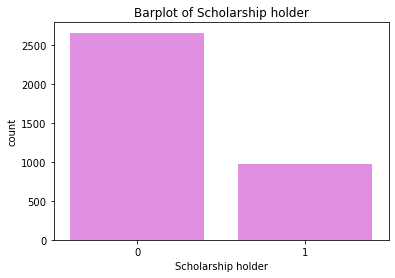

In [97]:
sns.countplot(df['Scholarship holder'], color='violet')
plt.title('Barplot of Scholarship holder')

In [98]:
df.rename(columns={"Scholarship holder": 'Scholarship_holder'}, inplace=True)

<AxesSubplot:xlabel='Scholarship_holder', ylabel='Gender'>

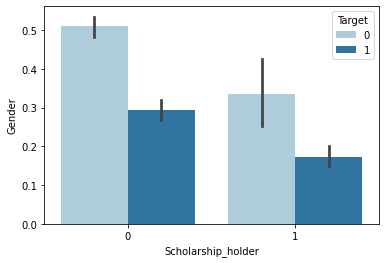

In [99]:
sns.barplot(data=df,x='Scholarship_holder',y='Gender', hue='Target', palette='Paired')

In [100]:
#Hypothesis Testing
a = pd.crosstab(df.Scholarship_holder, df.Target)
chi2_contingency(a)[1]

5.109075045012705e-79

# Age at enrollment

In [101]:
df.rename(columns={"Age at enrollment": 'Age_at_enrollment'}, inplace=True)

In [102]:
df.Age_at_enrollment.value_counts()

18    864
19    754
20    459
21    252
22    137
24    101
23     84
27     79
26     75
25     72
28     68
29     61
32     56
34     48
31     48
35     44
30     43
37     37
33     37
39     33
36     32
41     26
38     25
43     22
44     19
40     19
45     18
47     16
50     14
49     12
46     12
42     11
48      8
51      7
53      6
54      6
55      5
52      4
59      3
17      3
58      3
57      2
60      2
61      1
70      1
62      1
Name: Age_at_enrollment, dtype: int64

Text(0.5, 1.0, 'Histogram of Age_at_enrollment')

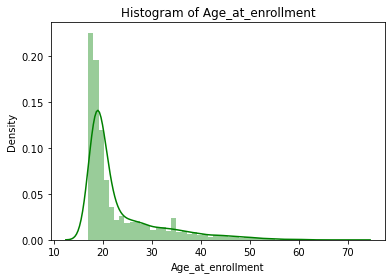

In [103]:
sns.distplot(df['Age_at_enrollment'], color = 'green')
plt.title('Histogram of Age_at_enrollment')

Text(0.5, 1.0, 'Boxplot of Age_at_enrollment')

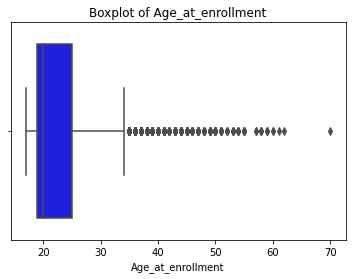

In [104]:
sns.boxplot(df['Age_at_enrollment'], color = 'blue')
plt.title('Boxplot of Age_at_enrollment')

In [105]:
q3=df.Age_at_enrollment.quantile(0.75)
q1=df.Age_at_enrollment.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [106]:
df.Age_at_enrollment=np.where(df.Age_at_enrollment>upper,upper,df.Age_at_enrollment)

Text(0.5, 1.0, 'Boxplot of Age_at_enrollment')

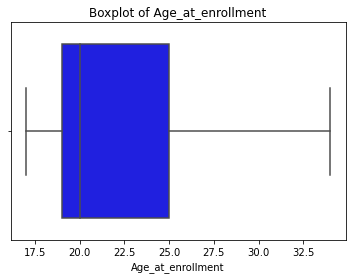

In [107]:
sns.boxplot(df['Age_at_enrollment'], color = 'blue')
plt.title('Boxplot of Age_at_enrollment')

<AxesSubplot:xlabel='Target', ylabel='Age_at_enrollment'>

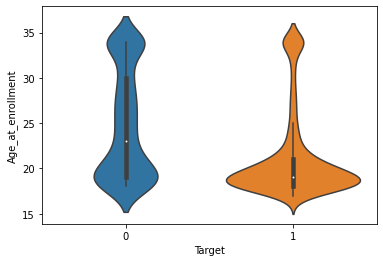

In [108]:
sns.violinplot(y='Age_at_enrollment', x='Target', data=df)

# International

In [109]:
df.International.value_counts()

0    3544
1      86
Name: International, dtype: int64

Text(0.5, 1.0, 'Barplot of International')

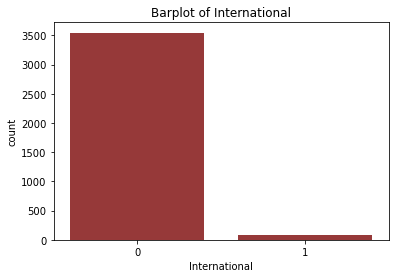

In [110]:
sns.countplot(df.International, color='brown')
plt.title('Barplot of International')

<AxesSubplot:xlabel='International', ylabel='Gender'>

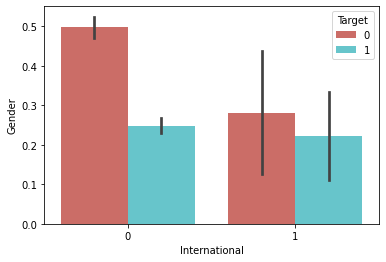

In [111]:
sns.barplot(data=df,x='International',y='Gender', hue='Target', palette='hls')

In [112]:
#Hypothesis Testing
a = pd.crosstab(df.International, df.Target)
chi2_contingency(a)[1]

0.7943866671082345

In [113]:
df.drop('International',axis=1,inplace=True)

# Curricular units 1st sem (credited)

In [114]:
df.rename(columns={"Curricular units 1st sem (credited)": 'Curricular_units_1st_sem_credited'}, inplace=True)

In [115]:
df.Curricular_units_1st_sem_credited.value_counts()

0     3150
2       71
1       67
3       57
6       43
4       43
5       31
7       31
8       27
9       24
11      16
10      14
14      14
13      12
12      11
15       5
18       4
17       3
16       3
19       2
20       2
Name: Curricular_units_1st_sem_credited, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_1st_sem_credited')

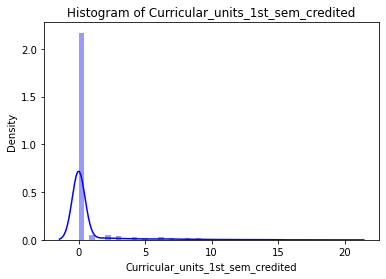

In [116]:
sns.distplot(df['Curricular_units_1st_sem_credited'], color='blue')
plt.title('Histogram of Curricular_units_1st_sem_credited')

Text(0.5, 1.0, 'Boxplot of Curricular_units_1st_sem_credited')

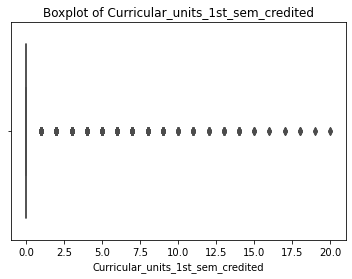

In [117]:
sns.boxplot(df['Curricular_units_1st_sem_credited'], color = 'red')
plt.title('Boxplot of Curricular_units_1st_sem_credited')

In [118]:
df.drop(['Curricular_units_1st_sem_credited'], axis=1, inplace=True)

In [119]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Age_at_enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'],
      dtype='object')

# Curricular units 1st sem (enrolled)

In [120]:
df.rename(columns={"Curricular units 1st sem (enrolled)": 'Curricular_units_1st_sem_enrolled'}, inplace=True)

In [121]:
df.Curricular_units_1st_sem_enrolled.value_counts()

6     1594
5      749
7      546
8      264
0      152
12      54
10      43
11      37
9       31
15      24
14      22
4       21
18      19
13      16
17      13
16      12
3        9
2        7
21       6
1        6
19       2
23       2
26       1
Name: Curricular_units_1st_sem_enrolled, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_1st_sem_enrolled')

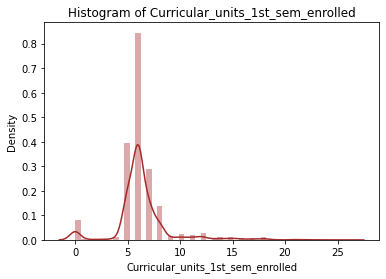

In [122]:
sns.distplot(df['Curricular_units_1st_sem_enrolled'], color='brown')
plt.title('Histogram of Curricular_units_1st_sem_enrolled')

Text(0.5, 1.0, 'Boxplot of Curricular_units_1st_sem_enrolled')

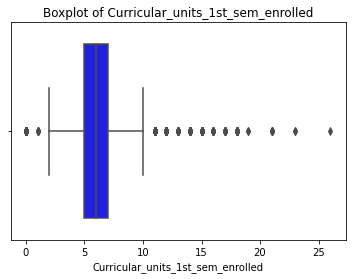

In [123]:
sns.boxplot(df['Curricular_units_1st_sem_enrolled'], color = 'blue')
plt.title('Boxplot of Curricular_units_1st_sem_enrolled')

In [124]:
q3=df.Curricular_units_1st_sem_enrolled.quantile(0.75)
q1=df.Curricular_units_1st_sem_enrolled.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

In [125]:
df.Curricular_units_1st_sem_enrolled=np.where(df.Curricular_units_1st_sem_enrolled>upper,upper,df.Curricular_units_1st_sem_enrolled)
df.Curricular_units_1st_sem_enrolled=np.where(df.Curricular_units_1st_sem_enrolled<lower,lower,df.Curricular_units_1st_sem_enrolled)

Text(0.5, 1.0, 'Boxplot of Curricular_units_1st_sem_enrolled')

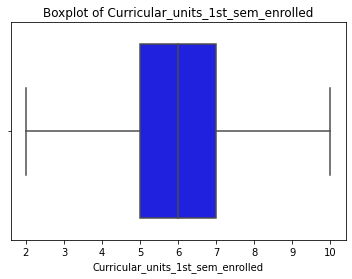

In [126]:
sns.boxplot(df['Curricular_units_1st_sem_enrolled'], color = 'blue')
plt.title('Boxplot of Curricular_units_1st_sem_enrolled')

# Curricular units 1st sem (evaluations)

In [128]:
df.rename(columns={"Curricular units 1st sem (evaluations)": 'Curricular_units_1st_sem_evaluations'}, inplace=True)

In [129]:
df.Curricular_units_1st_sem_evaluations.value_counts()

8     674
7     621
6     530
0     321
9     296
10    235
5     193
11    162
12    160
13    104
14     77
15     49
16     37
17     29
18     22
19     18
4      18
21     15
22     10
20     10
23      9
3       6
2       6
24      5
1       5
26      4
25      3
45      2
29      2
27      2
36      1
32      1
31      1
28      1
33      1
Name: Curricular_units_1st_sem_evaluations, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_1st_sem_evaluations')

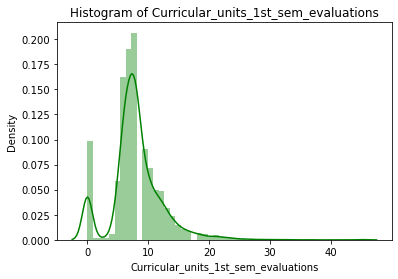

In [130]:
sns.distplot(df['Curricular_units_1st_sem_evaluations'], color='green')
plt.title('Histogram of Curricular_units_1st_sem_evaluations')

Text(0.5, 1.0, 'Boxplot of Curricular_units_1st_sem_evaluations')

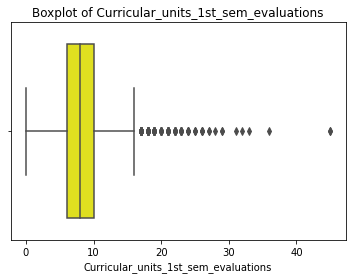

In [131]:
sns.boxplot(df['Curricular_units_1st_sem_evaluations'], color = 'yellow')
plt.title('Boxplot of Curricular_units_1st_sem_evaluations')

In [132]:
q3=df.Curricular_units_1st_sem_evaluations.quantile(0.75)
q1=df.Curricular_units_1st_sem_evaluations.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [133]:
df.Curricular_units_1st_sem_evaluations=np.where(df.Curricular_units_1st_sem_evaluations>upper,upper,df.Curricular_units_1st_sem_evaluations)

Text(0.5, 1.0, 'Boxplot of Curricular_units_1st_sem_evaluations')

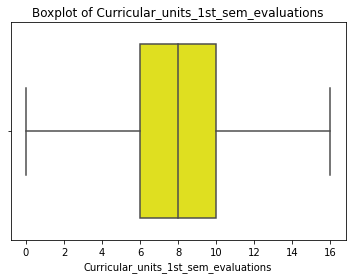

In [134]:
sns.boxplot(df['Curricular_units_1st_sem_evaluations'], color = 'yellow')
plt.title('Boxplot of Curricular_units_1st_sem_evaluations')

# Curricular units 1st sem (approved)

In [135]:
df.rename(columns={"Curricular units 1st sem (approved)": 'Curricular_units_1st_sem_approved'}, inplace=True)

In [136]:
df.Curricular_units_1st_sem_approved.value_counts()

6     1033
0      647
5      530
7      429
4      288
3      176
2      118
1       94
8       94
11      42
12      40
9       35
13      23
10      21
18      15
14      14
17      10
15       6
16       5
21       4
20       3
19       2
26       1
Name: Curricular_units_1st_sem_approved, dtype: int64

Text(0.5, 1.0, 'Barplot of Curricular_units_1st_sem_approved')

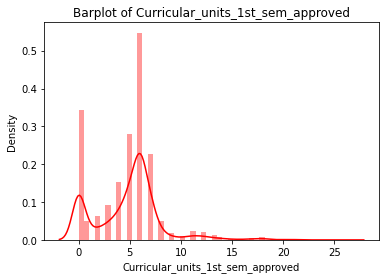

In [137]:
sns.distplot(df['Curricular_units_1st_sem_approved'], color='red')
plt.title('Barplot of Curricular_units_1st_sem_approved')

Text(0.5, 1.0, 'Boxplot of Curricular_units_1st_sem_approved')

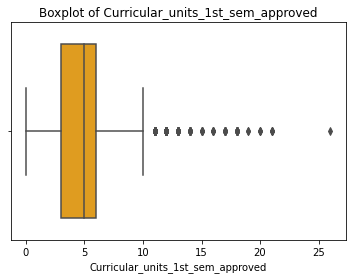

In [138]:
sns.boxplot(df['Curricular_units_1st_sem_approved'], color = 'orange')
plt.title('Boxplot of Curricular_units_1st_sem_approved')

In [139]:
q3=df.Curricular_units_1st_sem_approved.quantile(0.75)
q1=df.Curricular_units_1st_sem_approved.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [140]:
df.Curricular_units_1st_sem_approved=np.where(df.Curricular_units_1st_sem_approved>upper,upper,df.Curricular_units_1st_sem_approved)

Text(0.5, 1.0, 'Boxplot of Curricular_units_1st_sem_approved')

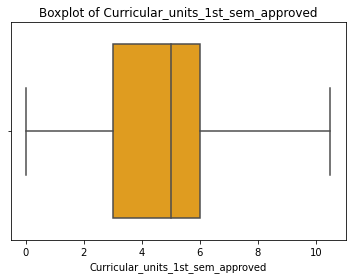

In [141]:
sns.boxplot(df['Curricular_units_1st_sem_approved'], color = 'orange')
plt.title('Boxplot of Curricular_units_1st_sem_approved')

# Curricular units 1st sem (grade)

In [142]:
df.rename(columns={"Curricular units 1st sem (grade)": 'Curricular_units_1st_sem_grade'}, inplace=True)

In [143]:
df.Curricular_units_1st_sem_grade.value_counts()

0.000000     647
12.000000    153
13.000000    123
11.000000     95
14.000000     70
            ... 
13.423750      1
11.785714      1
11.677778      1
13.925714      1
14.912500      1
Name: Curricular_units_1st_sem_grade, Length: 752, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_1st_sem_grade')

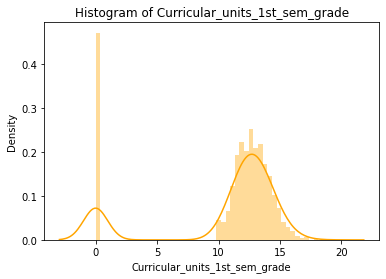

In [144]:
sns.distplot(df['Curricular_units_1st_sem_grade'], color='orange')
plt.title('Histogram of Curricular_units_1st_sem_grade')

Text(0.5, 1.0, 'Boxplot of Curricular_units_1st_sem_grade')

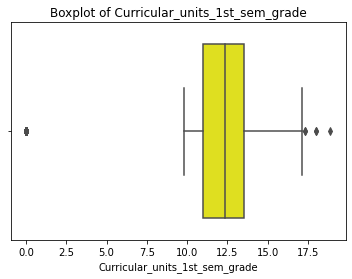

In [145]:
sns.boxplot(df['Curricular_units_1st_sem_grade'], color='yellow')
plt.title('Boxplot of Curricular_units_1st_sem_grade')

In [146]:
q3=df.Curricular_units_1st_sem_grade.quantile(0.75)
q1=df.Curricular_units_1st_sem_grade.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower= q1-(1.5*iqr)

In [147]:
df['Curricular_units_1st_sem_grade'] = np.where(df['Curricular_units_1st_sem_grade']>upper, upper, df['Curricular_units_1st_sem_grade'])
df['Curricular_units_1st_sem_grade'] = np.where(df['Curricular_units_1st_sem_grade']<lower, lower, df['Curricular_units_1st_sem_grade'])

Text(0.5, 1.0, 'Boxplot of Curricular_units_1st_sem_grade')

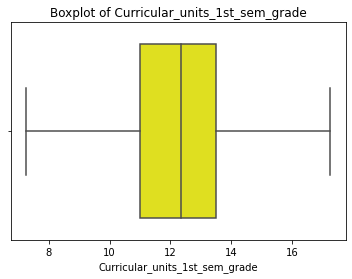

In [148]:
sns.boxplot(df['Curricular_units_1st_sem_grade'], color='yellow')
plt.title('Boxplot of Curricular_units_1st_sem_grade')

# Curricular units 1st sem (without evaluations)

In [149]:
df.rename(columns={"Curricular units 1st sem (without evaluations)": 'Curricular_units_1st_sem_without_evaluations'}, inplace=True)

In [150]:
df.Curricular_units_1st_sem_without_evaluations.value_counts()

0     3406
1      118
2       58
3       16
4       14
6        5
7        5
5        3
12       2
8        2
10       1
Name: Curricular_units_1st_sem_without_evaluations, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_1st_sem_without_evaluations')

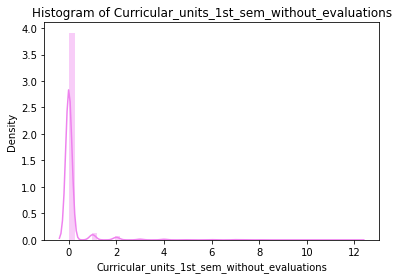

In [151]:
sns.distplot(df['Curricular_units_1st_sem_without_evaluations'], color='violet')
plt.title('Histogram of Curricular_units_1st_sem_without_evaluations')

Text(0.5, 1.0, 'Boxplot of Curricular_units_1st_sem_without_evaluations')

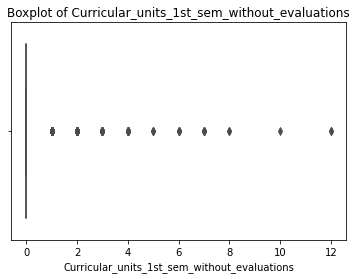

In [152]:
sns.boxplot(df['Curricular_units_1st_sem_without_evaluations'], color='blue')
plt.title('Boxplot of Curricular_units_1st_sem_without_evaluations')

In [153]:
df.drop(['Curricular_units_1st_sem_without_evaluations'], axis=1, inplace=True)

# Curricular units 2nd sem (credited)

In [154]:
df.rename(columns={"Curricular units 2nd sem (credited)": 'Curricular_units_2nd_sem_credited'}, inplace=True)

In [155]:
df.Curricular_units_2nd_sem_credited.value_counts()

0     3183
1       82
2       80
5       61
4       61
3       40
6       24
11      20
9       13
12      13
7       12
10      11
8       10
13       9
14       4
15       2
16       2
18       2
19       1
Name: Curricular_units_2nd_sem_credited, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_2nd_sem_credited')

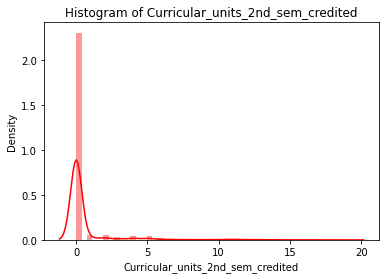

In [156]:
sns.distplot(df['Curricular_units_2nd_sem_credited'], color='red')
plt.title('Histogram of Curricular_units_2nd_sem_credited')

Text(0.5, 1.0, 'Boxplot of Curricular_units_2nd_sem_credited')

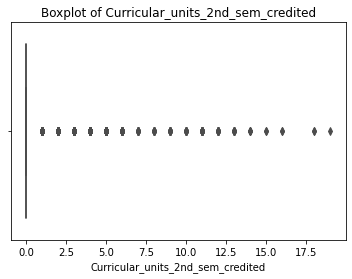

In [157]:
sns.boxplot(df['Curricular_units_2nd_sem_credited'], color='yellow')
plt.title('Boxplot of Curricular_units_2nd_sem_credited')

In [158]:
df.drop(['Curricular_units_2nd_sem_credited'], axis=1, inplace=True)

# Curricular units 2nd sem (enrolled)

In [159]:
df.rename(columns={"Curricular units 2nd sem (enrolled)": 'Curricular_units_2nd_sem_enrolled'}, inplace=True)

In [160]:
df.Curricular_units_2nd_sem_enrolled.value_counts()

6     1596
5      789
8      596
7      224
0      152
11      50
9       44
12      39
10      38
13      34
14      22
4       15
17      10
2        5
1        3
19       3
3        2
15       2
23       2
18       2
16       1
21       1
Name: Curricular_units_2nd_sem_enrolled, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_2nd_sem_enrolled')

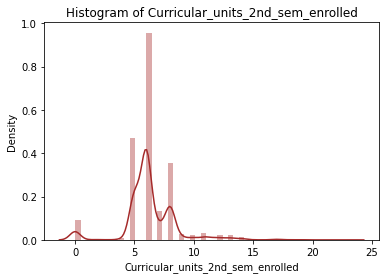

In [161]:
sns.distplot(df['Curricular_units_2nd_sem_enrolled'], color='brown')
plt.title('Histogram of Curricular_units_2nd_sem_enrolled')

Text(0.5, 1.0, 'Boxplot of Curricular_units_2nd_sem_enrolled')

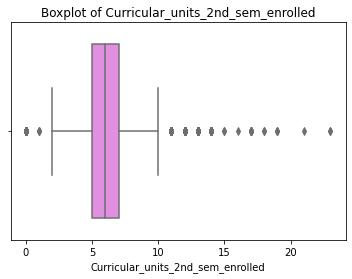

In [162]:
sns.boxplot(df['Curricular_units_2nd_sem_enrolled'], color='violet')
plt.title('Boxplot of Curricular_units_2nd_sem_enrolled')

In [163]:
q3=df.Curricular_units_2nd_sem_enrolled.quantile(0.75)
q1=df.Curricular_units_2nd_sem_enrolled.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

In [164]:
df.Curricular_units_2nd_sem_enrolled=np.where(df.Curricular_units_2nd_sem_enrolled>upper,upper,df.Curricular_units_2nd_sem_enrolled)

In [165]:
df.Curricular_units_2nd_sem_enrolled=np.where(df.Curricular_units_2nd_sem_enrolled<lower,lower,df.Curricular_units_2nd_sem_enrolled)

Text(0.5, 1.0, 'Boxplot of Curricular_units_2nd_sem_enrolled')

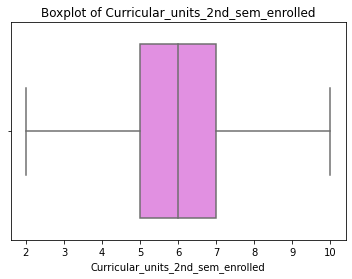

In [166]:
sns.boxplot(df['Curricular_units_2nd_sem_enrolled'], color='violet')
plt.title('Boxplot of Curricular_units_2nd_sem_enrolled')

# Curricular units 2nd sem (evaluations)

In [167]:
df.rename(columns={"Curricular units 2nd sem (evaluations)": 'Curricular_units_2nd_sem_evaluations'}, inplace=True)

In [168]:
df.Curricular_units_2nd_sem_evaluations.value_counts()

8     654
6     556
7     478
0     372
9     353
5     268
10    257
11    181
12    150
13     98
14     77
15     53
16     36
18     18
17     15
19     11
4       8
21      8
22      8
20      8
2       4
23      4
1       3
26      3
24      3
27      1
25      1
33      1
3       1
Name: Curricular_units_2nd_sem_evaluations, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_2nd_sem_evaluations')

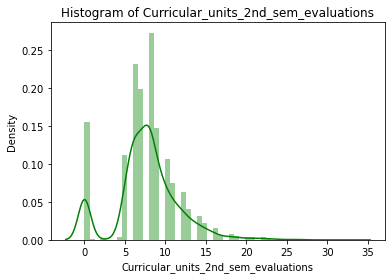

In [169]:
sns.distplot(df['Curricular_units_2nd_sem_evaluations'], color='green')
plt.title('Histogram of Curricular_units_2nd_sem_evaluations')

Text(0.5, 1.0, 'Boxplot of Curricular_units_2nd_sem_evaluations')

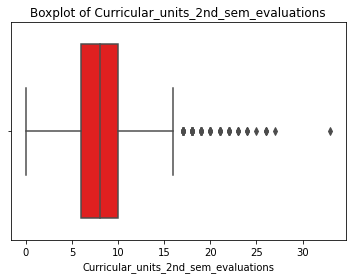

In [170]:
sns.boxplot(df['Curricular_units_2nd_sem_evaluations'], color='red')
plt.title('Boxplot of Curricular_units_2nd_sem_evaluations')

In [171]:
q3=df.Curricular_units_2nd_sem_evaluations.quantile(0.75)
q1=df.Curricular_units_2nd_sem_evaluations.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [172]:
df.Curricular_units_2nd_sem_evaluations=np.where(df.Curricular_units_2nd_sem_evaluations>upper,upper,df.Curricular_units_2nd_sem_evaluations)

Text(0.5, 1.0, 'Boxplot of Curricular_units_2nd_sem_evaluations')

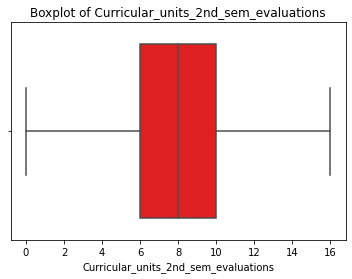

In [173]:
sns.boxplot(df['Curricular_units_2nd_sem_evaluations'], color='red')
plt.title('Boxplot of Curricular_units_2nd_sem_evaluations')

# Curricular units 2nd sem (approved)

In [174]:
df.rename(columns={"Curricular units 2nd sem (approved)": 'Curricular_units_2nd_sem_approved'}, inplace=True)

In [175]:
df.Curricular_units_2nd_sem_approved.value_counts()

6     867
0     802
5     569
8     306
7     287
4     254
3     161
2     121
1      86
11     44
12     32
10     32
9      25
13     21
17      8
14      6
19      3
20      2
16      2
18      2
Name: Curricular_units_2nd_sem_approved, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_2nd_sem_approved')

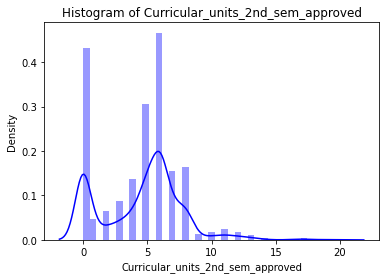

In [176]:
sns.distplot(df['Curricular_units_2nd_sem_approved'], color='blue')
plt.title('Histogram of Curricular_units_2nd_sem_approved')

Text(0.5, 1.0, 'Boxplot of Curricular_units_2nd_sem_approved')

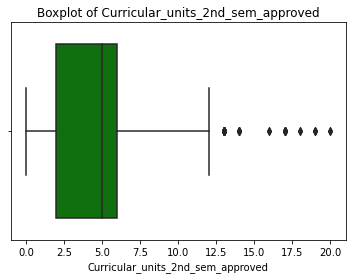

In [177]:
sns.boxplot(df['Curricular_units_2nd_sem_approved'], color='green')
plt.title('Boxplot of Curricular_units_2nd_sem_approved')

In [178]:
q3=df.Curricular_units_2nd_sem_approved.quantile(0.75)
q1=df.Curricular_units_2nd_sem_approved.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [179]:
df.Curricular_units_2nd_sem_approved=np.where(df.Curricular_units_2nd_sem_approved>upper,upper,df.Curricular_units_2nd_sem_approved)

Text(0.5, 1.0, 'Boxplot of Curricular_units_2nd_sem_approved')

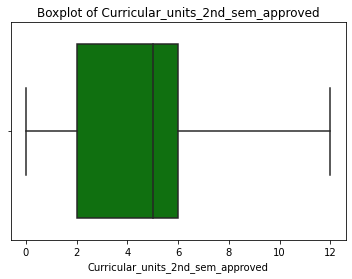

In [180]:
sns.boxplot(df['Curricular_units_2nd_sem_approved'], color='green')
plt.title('Boxplot of Curricular_units_2nd_sem_approved')

# Curricular units 2nd sem (grade)

In [181]:
df.rename(columns={"Curricular units 2nd sem (grade)": 'Curricular_units_2nd_sem_grade'}, inplace=True)

In [182]:
df.Curricular_units_2nd_sem_grade.value_counts()

0.000000     802
12.000000    122
13.000000    117
11.000000    111
14.000000     63
            ... 
13.024286      1
12.464286      1
13.423750      1
11.785714      1
11.083333      1
Name: Curricular_units_2nd_sem_grade, Length: 724, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_2nd_sem_grade')

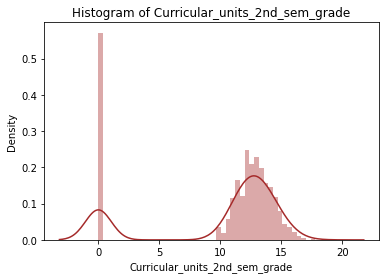

In [183]:
sns.distplot(df['Curricular_units_2nd_sem_grade'], color='brown')
plt.title('Histogram of Curricular_units_2nd_sem_grade')

Text(0.5, 1.0, 'Boxplot of Curricular_units_2nd_sem_grade')

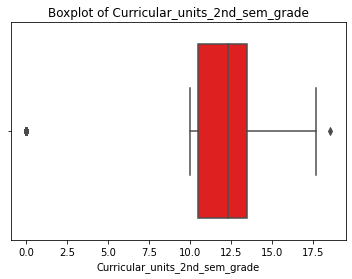

In [184]:
sns.boxplot(df['Curricular_units_2nd_sem_grade'], color='red')
plt.title('Boxplot of Curricular_units_2nd_sem_grade')

In [185]:
q3=df.Curricular_units_2nd_sem_grade.quantile(0.75)
q1=df.Curricular_units_2nd_sem_grade.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower= q1-(1.5*iqr)

In [186]:
df['Curricular_units_2nd_sem_grade'] = np.where(df['Curricular_units_2nd_sem_grade']>upper, upper, df['Curricular_units_2nd_sem_grade'])
df['Curricular_units_2nd_sem_grade'] = np.where(df['Curricular_units_2nd_sem_grade']<lower, lower, df['Curricular_units_2nd_sem_grade'])

Text(0.5, 1.0, 'Boxplot of Curricular_units_2nd_sem_grade')

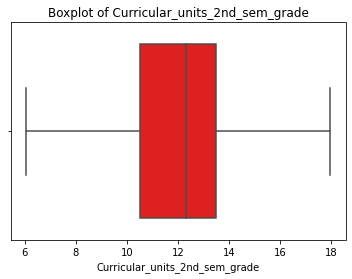

In [187]:
sns.boxplot(df['Curricular_units_2nd_sem_grade'], color='red')
plt.title('Boxplot of Curricular_units_2nd_sem_grade')

# Curricular units 2nd sem (without evaluations)

In [188]:
df.rename(columns={"Curricular units 2nd sem (without evaluations)": 'Curricular_units_2nd_sem_without_evaluations'}, inplace=True)

In [189]:
df.Curricular_units_2nd_sem_without_evaluations.value_counts()

0     3416
1      107
2       35
3       23
5       16
4       16
6        7
7        4
8        4
12       2
Name: Curricular_units_2nd_sem_without_evaluations, dtype: int64

Text(0.5, 1.0, 'Histogram of Curricular_units_2nd_sem_without_evaluations')

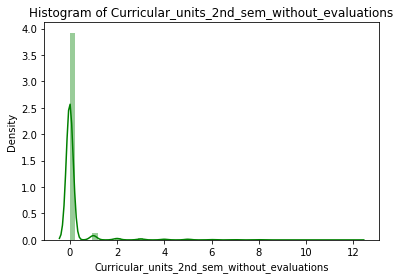

In [190]:
sns.distplot(df['Curricular_units_2nd_sem_without_evaluations'], color='green')
plt.title('Histogram of Curricular_units_2nd_sem_without_evaluations')

Text(0.5, 1.0, 'Boxplot of Curricular_units_2nd_sem_without_evaluations')

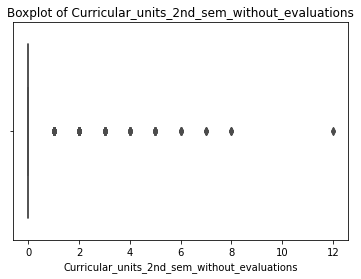

In [191]:
sns.boxplot(df['Curricular_units_2nd_sem_without_evaluations'], color='orange')
plt.title('Boxplot of Curricular_units_2nd_sem_without_evaluations')

In [192]:
df.drop(['Curricular_units_2nd_sem_without_evaluations'], axis=1, inplace=True)

# Unemployment rate

In [193]:
df['Unemployment rate'].value_counts()

7.6     452
10.8    435
9.4     424
12.7    356
12.4    355
11.1    347
15.5    328
13.9    326
16.2    316
8.9     291
Name: Unemployment rate, dtype: int64

Text(0.5, 1.0, 'Histogram of Unemployment rate')

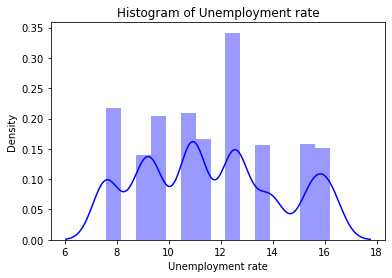

In [194]:
sns.distplot(df['Unemployment rate'], color='blue')
plt.title('Histogram of Unemployment rate')

Text(0.5, 1.0, 'Boxplot of Unemployment rate')

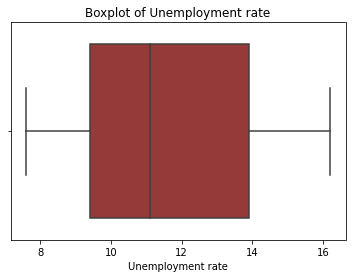

In [195]:
sns.boxplot(df['Unemployment rate'], color='brown')
plt.title('Boxplot of Unemployment rate')

In [196]:
df.rename(columns={"Unemployment rate": 'Unemployment_rate'}, inplace=True)

# Inflation rate

In [197]:
df['Inflation rate'].value_counts()

 1.4    726
 2.6    452
-0.8    424
 3.7    356
 0.5    355
 0.6    347
 2.8    328
-0.3    326
 0.3    316
Name: Inflation rate, dtype: int64

Text(0.5, 1.0, 'Histogram of Inflation rate')

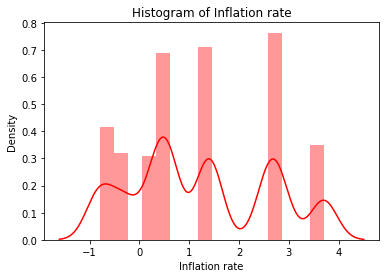

In [198]:
sns.distplot(df['Inflation rate'], color='red')
plt.title('Histogram of Inflation rate')

Text(0.5, 1.0, 'Boxplot of Inflation rate')

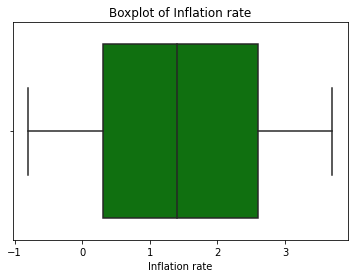

In [199]:
sns.boxplot(df['Inflation rate'], color='green')
plt.title('Boxplot of Inflation rate')

In [200]:
df.rename(columns={"Inflation rate": 'Inflation_rate'}, inplace=True)

# GDP

In [201]:
df.GDP.value_counts()

 0.32    452
 1.74    435
-3.12    424
-1.70    356
 1.79    355
 2.02    347
-4.06    328
 0.79    326
-0.92    316
 3.51    291
Name: GDP, dtype: int64

Text(0.5, 1.0, 'Histogram of GDP')

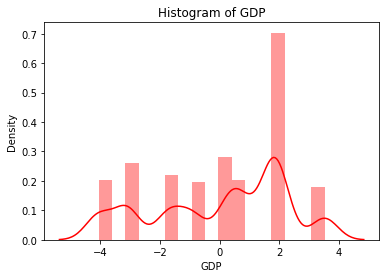

In [202]:
sns.distplot(df['GDP'], color='red')
plt.title('Histogram of GDP')

Text(0.5, 1.0, 'Boxplot of GDP')

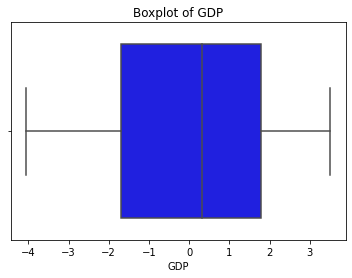

In [203]:
sns.boxplot(df['GDP'], color='blue')
plt.title('Boxplot of GDP')

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marital_status                        3630 non-null   int64  
 1   Application_mode                      3630 non-null   int64  
 2   Application_order                     3630 non-null   int64  
 3   Course                                3630 non-null   int64  
 4   Daytime_evening_attendance            3630 non-null   int64  
 5   Previous_qualification                3630 non-null   int64  
 6   Mothers_qualification                 3630 non-null   int64  
 7   Fathers_qualification                 3630 non-null   int64  
 8   Mothers_occupation                    3630 non-null   int64  
 9   Fathers_occupation                    3630 non-null   int64  
 10  Displaced                             3630 non-null   int64  
 11  Debtor           

In [206]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,Inflation_rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,...,0.0,7.250000,2.0,0.0,0.0,6.044643,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,3,4,4,...,6.0,14.000000,6.0,6.0,6.0,13.666667,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,22,27,10,10,...,0.0,7.250000,6.0,0.0,0.0,6.044643,10.8,1.4,1.74,0
3,1,8,2,15,1,1,23,27,6,4,...,6.0,13.428571,6.0,10.0,5.0,12.400000,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,22,28,10,10,...,5.0,12.333333,6.0,6.0,6.0,13.000000,13.9,-0.3,0.79,1


# VIF

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [208]:
#Splitting Data
x=df.drop('Target',axis=1)
y=df['Target']

In [209]:
num_df=['Age_at_enrollment','Curricular_units_1st_sem_enrolled','Curricular_units_1st_sem_evaluations','Curricular_units_1st_sem_approved','Curricular_units_1st_sem_grade','Curricular_units_2nd_sem_enrolled','Curricular_units_2nd_sem_evaluations','Curricular_units_2nd_sem_approved','Curricular_units_2nd_sem_grade','Unemployment_rate','Inflation_rate','GDP']

In [210]:
num_df=df[num_df]

<AxesSubplot:>

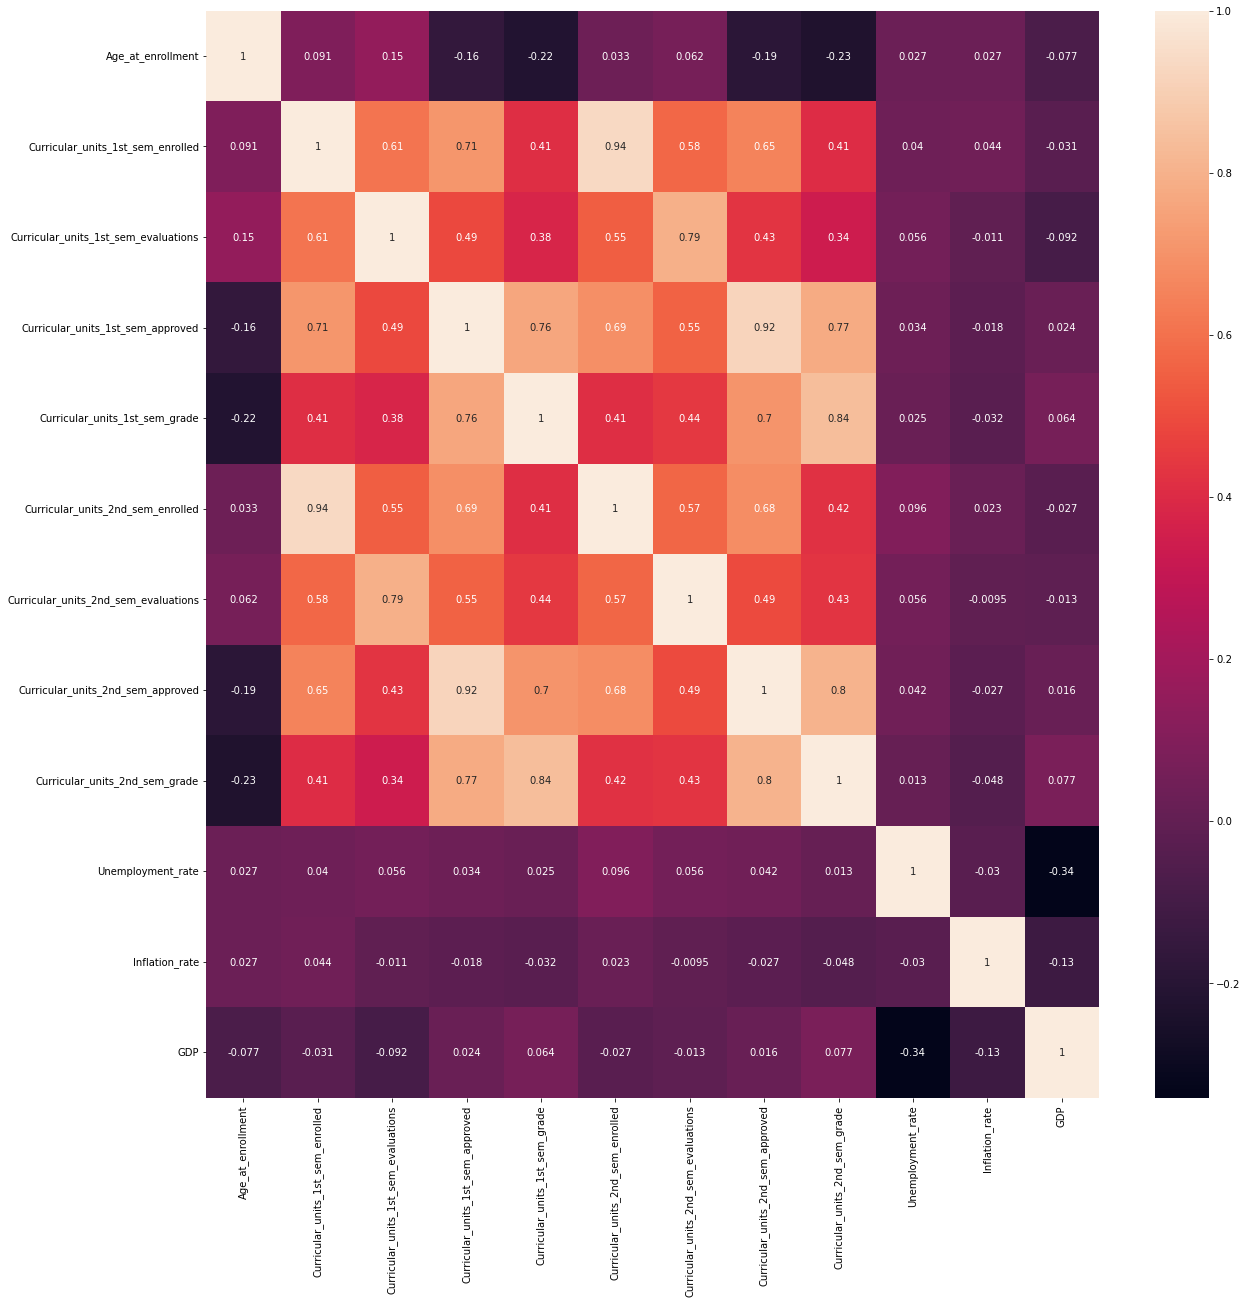

In [302]:
plt.figure(figsize=(20,20))
sns.heatmap(num_df.corr(),annot=True)

In [211]:
num_df.columns

Index(['Age_at_enrollment', 'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Unemployment_rate', 'Inflation_rate', 'GDP'],
      dtype='object')

In [212]:
vif_da=num_df
vif_data=pd.DataFrame()
vif_data['feature']=vif_da.columns

vif_data['VIF']=[variance_inflation_factor(vif_da.values,i)for i in range(len(vif_da.columns))]
print(vif_data)

                                 feature         VIF
0                      Age_at_enrollment   17.671719
1      Curricular_units_1st_sem_enrolled  180.240457
2   Curricular_units_1st_sem_evaluations   17.954166
3      Curricular_units_1st_sem_approved   35.233847
4         Curricular_units_1st_sem_grade   84.377392
5      Curricular_units_2nd_sem_enrolled  166.941706
6   Curricular_units_2nd_sem_evaluations   16.972274
7      Curricular_units_2nd_sem_approved   29.358036
8         Curricular_units_2nd_sem_grade   74.108933
9                      Unemployment_rate   19.680181
10                        Inflation_rate    1.836421
11                                   GDP    1.175224


In [213]:
df.drop(['Age_at_enrollment','Curricular_units_1st_sem_enrolled','Curricular_units_1st_sem_evaluations','Curricular_units_1st_sem_approved','Curricular_units_1st_sem_grade','Curricular_units_2nd_sem_enrolled','Curricular_units_2nd_sem_evaluations','Curricular_units_2nd_sem_approved','Curricular_units_2nd_sem_grade','Unemployment_rate'],axis=1,inplace=True)

In [214]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Inflation_rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,1,0,1,1,0,1.4,1.74,0
1,1,6,1,11,1,1,1,3,4,4,1,0,0,1,0,-0.3,0.79,1
2,1,1,5,5,1,1,22,27,10,10,1,0,0,1,0,1.4,1.74,0
3,1,8,2,15,1,1,23,27,6,4,1,0,1,0,0,-0.8,-3.12,1
4,2,12,1,3,0,1,22,28,10,10,0,0,1,0,0,-0.3,0.79,1


In [215]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Inflation_rate', 'GDP', 'Target'],
      dtype='object')

In [284]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Inflation_rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,1,0,1,1,0,1.4,1.74,0
1,1,6,1,11,1,1,1,3,4,4,1,0,0,1,0,-0.3,0.79,1
2,1,1,5,5,1,1,22,27,10,10,1,0,0,1,0,1.4,1.74,0
3,1,8,2,15,1,1,23,27,6,4,1,0,1,0,0,-0.8,-3.12,1
4,2,12,1,3,0,1,22,28,10,10,0,0,1,0,0,-0.3,0.79,1


In [285]:
df.shape

(3630, 18)

In [216]:
df.Target.value_counts()

1    2209
0    1421
Name: Target, dtype: int64

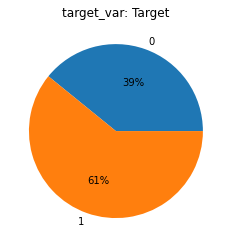

In [217]:
target_var=pd.crosstab(index=df['Target'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('target_var: Target')
plt.show()

# Data Preprocessing

In [218]:
x = df.drop("Target",axis = 1)
y =  df["Target"]

In [219]:
from sklearn.preprocessing import StandardScaler

In [220]:
sc=StandardScaler()
sc_x=sc.fit_transform(x)

In [221]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV

In [222]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

# Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(xtrain,ytrain)

LogisticRegression()

In [224]:
y_pred = lm.predict(xtest)

In [225]:
accuracy_score(ytest,y_pred)

0.7640036730945822

In [226]:
p_x=lm.predict(xtrain)

In [227]:
lm.score(xtest,ytest)

0.7640036730945822

In [228]:
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.55      0.64       424
           1       0.76      0.90      0.82       665

    accuracy                           0.76      1089
   macro avg       0.77      0.72      0.73      1089
weighted avg       0.77      0.76      0.75      1089



In [229]:
print(metrics.confusion_matrix(ytest, y_pred))

[[232 192]
 [ 65 600]]


# Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [231]:
rf=RandomForestClassifier(random_state=30)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=30)

In [232]:
params={
    'n_estimators':[20,30,40,50,60],
    'max_features':['sqrt',0.25,0.5,0.75,1],
}

In [233]:
gd=GridSearchCV(rf,params)

In [234]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=30),
             param_grid={'max_features': ['sqrt', 0.25, 0.5, 0.75, 1],
                         'n_estimators': [20, 30, 40, 50, 60]})

In [235]:
rf=gd.best_params_
rf

{'max_features': 1, 'n_estimators': 60}

In [236]:
rf=RandomForestClassifier(max_features =  'sqrt' ,n_estimators=50)

In [237]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_features='sqrt', n_estimators=50)

In [238]:
y_pred=rf.predict(xtest)

In [239]:
confusion_matrix(ytest,y_pred)

array([[260, 164],
       [ 91, 574]], dtype=int64)

In [240]:
rf.score(xtest,ytest)

0.7658402203856749

In [241]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67       424
           1       0.78      0.86      0.82       665

    accuracy                           0.77      1089
   macro avg       0.76      0.74      0.74      1089
weighted avg       0.76      0.77      0.76      1089



In [242]:
prob=rf.predict_proba(xtest)
prob

array([[0.26, 0.74],
       [0.46, 0.54],
       [0.3 , 0.7 ],
       ...,
       [0.44, 0.56],
       [0.16, 0.84],
       [0.  , 1.  ]])

In [243]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.8224730458221025


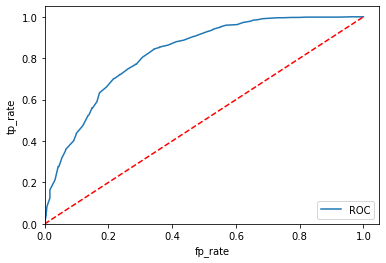

In [244]:
plt.figure()
plt.plot(fp,tp,label='ROC')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('fp_rate')
plt.ylabel('tp_rate')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [245]:
from sklearn.tree import DecisionTreeClassifier

In [246]:
dt=DecisionTreeClassifier()

In [247]:
parm={'criterion' :['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10],}

In [248]:
grid=GridSearchCV(dt,parm)

In [249]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [250]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [251]:
dt=DecisionTreeClassifier(criterion =  'entropy', max_depth=10, random_state=20)

In [252]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=20)

In [253]:
y_pred=dt.predict(xtest)

In [254]:
confusion_matrix(ytest,y_pred)

array([[240, 184],
       [126, 539]], dtype=int64)

In [255]:
grid.score(xtest,ytest)

0.7731864095500459

In [256]:
accuracy_score(ytest,y_pred)

0.7153351698806244

In [257]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       424
           1       0.75      0.81      0.78       665

    accuracy                           0.72      1089
   macro avg       0.70      0.69      0.69      1089
weighted avg       0.71      0.72      0.71      1089



# SVM

In [258]:
from sklearn.svm import SVC
from sklearn import svm

In [259]:
#SVC - Suppot Vector Classifier
svc =svm.SVC(class_weight='balanced',probability=True) 
td_svc = svc.fit(xtrain,ytrain)
td_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [260]:
y_pred_lin = td_svc.predict(xtest)
len(y_pred_lin)

1089

In [261]:
print('accuracy',accuracy_score(ytest,y_pred_lin))

accuracy 0.660238751147842


In [262]:
print(confusion_matrix(ytest,y_pred_lin))

[[299 125]
 [245 420]]


In [263]:
print(classification_report(ytest,y_pred_lin))

              precision    recall  f1-score   support

           0       0.55      0.71      0.62       424
           1       0.77      0.63      0.69       665

    accuracy                           0.66      1089
   macro avg       0.66      0.67      0.66      1089
weighted avg       0.68      0.66      0.66      1089



# Naives Bayes

In [264]:
from  sklearn.naive_bayes import GaussianNB

In [265]:
gn=GaussianNB()

In [266]:
gn.fit(xtrain,ytrain)

GaussianNB()

In [267]:
y_pred=gn.predict(xtest)

In [268]:
accuracy_score(ytest,y_pred)

0.7410468319559229

# KNN

In [269]:
from sklearn.neighbors import KNeighborsClassifier

In [270]:
param_grid = {'n_neighbors' :list(np.arange(1,90,2)),
             'weights' :['uniform','distance'],
             'metric': ['euclidean','manhanttan','minkowki']}

In [271]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,param_grid)

In [272]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhanttan', 'minkowki'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...],
                         'weights': ['uniform', 'distance']})

In [273]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 43, 'weights': 'distance'}

In [274]:
knn=KNeighborsClassifier(metric = 'euclidean',n_neighbors=59,algorithm='ball_tree',weights = 'distance')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=59,
                     weights='distance')

In [275]:
y_pred_knn=knn.predict(xtest)

In [276]:
#accuracy score
accuracy_score(ytest,y_pred_knn)

0.6648301193755739

In [277]:
print(classification_report(ytest,y_pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.32      0.43       424
           1       0.67      0.89      0.76       665

    accuracy                           0.66      1089
   macro avg       0.66      0.60      0.59      1089
weighted avg       0.66      0.66      0.63      1089



In [278]:
confusion_matrix(ytest,y_pred_knn)

array([[135, 289],
       [ 76, 589]], dtype=int64)

In [279]:
knn=KNeighborsClassifier(n_neighbors=1100,algorithm='kd_tree')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1100)

In [280]:
accuracy_score(ytest,y_pred)

0.7410468319559229

# Ada Boost

In [286]:
from sklearn.ensemble import AdaBoostClassifier

In [287]:
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
model.fit(xtrain, ytrain)

AdaBoostClassifier()

In [288]:
y_pred = model.predict(xtest)

In [289]:
accuracy_score(ytest, y_pred)

0.7750229568411386

# Gradient Boost

In [290]:
from sklearn.ensemble import GradientBoostingClassifier

In [291]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=42)

In [292]:
y_pred = gb_clf.predict(xtest)

In [293]:
accuracy_score(ytest, y_pred)

0.7878787878787878

# XG Boost

In [294]:
!pip install xgboost

In [295]:
from xgboost import XGBClassifier

In [296]:
params = {
    "objective": "binary:logistic",
    "learning_rate": 0.1,
    "max_depth": 3,
    "n_estimators": 100,
    "seed": 42
}


In [297]:
model = XGBClassifier(**params)

In [298]:
model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [299]:
y_pred = model.predict(xtest)

In [300]:
accuracy_score(ytest, y_pred)

0.7952249770431589

# Accuracy Scores Comparison